# I.Import Librairies

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install pyproj==1.9.6
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

!pip install pyspellchecker
!pip install emoji
!pip install spacy

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import re
from geopy.geocoders import Nominatim
from datetime import date
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans,vq
from mpl_toolkits.basemap import Basemap
import collections
import os
import string
import sys
import scipy
import spellchecker
import emoji
import spacy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# II. Import datasets 

After collecting multiple datasets witht the previous notebook, we will now group all the information in different files into one dataframe that we wil analyze. 

The objective of this part is to build a dataset, and perform a quick overview of the data.

## A. Build the dataset

###### Import datasets

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_1.csv', engine='python' )
df2 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_2.csv', engine='python' )
df3 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_3.csv', engine='python' )
df4 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_4.csv', engine='python' )
df5 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_5.csv', engine='python' )
df6 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_6.csv', engine='python' )

###### Concatenate dataframes

In [ ]:
frames = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames)

######  Delete dataframes from memory

In [ ]:
del frames

##### Define function to get original dataset 

In [ ]:
def get_original_data():
  df1 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_1.csv', engine='python' )
  df2 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_2.csv', engine='python' )
  df3 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_3.csv', engine='python' )
  df4 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_4.csv', engine='python' )
  df5 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_5.csv', engine='python' )
  df6 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_6.csv', engine='python' )
  frames = [df1, df2, df3, df4, df5, df6]
  df = pd.concat(frames)
  return df 
  

## B. Quick overview

##### Shape

In [ ]:
print("The dataset contains", df.shape[0], "lines, and ", df.shape[1], "columns")

The dataset contains 2429302 lines, and  21 columns


##### Columns

In [ ]:
print("The columns are:")
for f in df.columns: print(f)

The columns are:
Unnamed: 0
Date
Topic
Id
Screen_Name
Name
Location
User Created_At
Followers_Count
Friends_Count
Favourites_Count
Verified
Created_At
Text
Favorite_Count
Source
Retweeted
Reply_Count
Retweet_Count
Retweeted.1
Hashtags


##### Head and Tail

In [ ]:
df.head()

,Unnamed: 0,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags
0,0,2020-11-25,Coronavirus,1331691372068409344,MoneyShow,MoneyShow,"Sarasota, FL",2008-10-28 19:34:16,18124.0,10645.0,3870.0,False,2020-11-25 20:08:59,Overstock is trading well off its coronavirus ...,0.0,HubSpot,False,0.0,0.0,False,[None]
1,1,2020-11-25,Coronavirus,1331691367005827076,MrsGailMelvin,Gail Melvin,"East Midlands, England",2016-09-20 14:19:15,439.0,720.0,1921.0,False,2020-11-25 20:08:58,The research staff in @PRCLeicester @Leic_hosp...,0.0,Twitter for Android,False,0.0,0.0,False,[None]
2,2,2020-11-25,Coronavirus,1331691365046992897,SoCalledEric,MyTracksAreBogus🦷,"Pomona, CA",2015-04-19 02:02:55,129.0,494.0,8926.0,False,2020-11-25 20:08:57,"Keep in mind, you may have stumbled with coron...",0.0,Twitter for iPhone,False,0.0,0.0,False,[None]
3,3,2020-11-25,Coronavirus,1331691364409597953,Austin_Zone,Austin Frisch,"Nashville, TN",2017-06-30 18:07:40,2242.0,166.0,4411.0,False,2020-11-25 20:08:57,"""About 30 minutes before the flight, Hancock's...",0.0,Twitter Web App,False,0.0,0.0,False,[None]
4,4,2020-11-25,Coronavirus,1331691363667152901,JuanGrvas,Juan Gérvas,"España, Spain",2012-09-19 18:59:21,18208.0,120.0,7.0,False,2020-11-25 20:08:57,USA. CDCs are likely to shorten their recommen...,0.0,Twitter Web App,False,0.0,0.0,False,[None]


In [ ]:
df.tail()

,Unnamed: 0,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags
291788,291783,2020-12-08,Corona or coronavirus or covid or covid19,1336401530552016896,guanweiyuan,ωγ,my head,2012-10-11 10:01:17,244.0,203.0,9661.0,False,2020-12-08 20:05:28,influenzavirus: yo im dope\ncoronavirus: but y...,0.0,Twitter for iPhone,False,0.0,0.0,False,[None]
291789,291784,2020-12-08,Corona or coronavirus or covid or covid19,1336401530543632386,badgerzip2002,Steve Zimmerman,"Chicago, IL",2009-08-04 01:28:15,235.0,849.0,4656.0,False,2020-12-08 20:05:28,"With the #COVID19 death toll nearing 300,000 a...",1.0,Twitter for iPhone,False,0.0,0.0,False,[['COVID19']]
291790,291785,2020-12-08,Corona or coronavirus or covid or covid19,1336401530128388097,straits_times,The Straits Times,Singapore,2009-05-05 06:48:23,1063823.0,129.0,2.0,True,2020-12-08 20:05:28,Trump lawyer Rudy Giuliani has 'improved signi...,2.0,Echobox,False,0.0,0.0,False,[None]
291791,291786,2020-12-08,Corona or coronavirus or covid or covid19,1336401529667006468,DTenenbaum,bed stuy guy,"Brooklyn, NY",2008-10-14 02:30:00,2181.0,3234.0,103193.0,False,2020-12-08 20:05:28,For reference: just got a Covid test at Woodhu...,0.0,Twitter for Android,False,0.0,0.0,False,[None]
291792,291787,2020-12-08,Corona or coronavirus or covid or covid19,1336401528232546304,jabariwill,William J. Ford,DMV,2009-04-24 03:50:12,1180.0,1436.0,87.0,False,2020-12-08 20:05:28,A message from @GovLarryHogan on #COVID19 vacc...,1.0,Twitter for iPhone,False,0.0,0.0,False,[['COVID19']]


##### Information and column types 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2429302 entries, 0 to 291792
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        object 
 1   Date              object 
 2   Topic             object 
 3   Id                object 
 4   Screen_Name       object 
 5   Name              object 
 6   Location          object 
 7   User Created_At   object 
 8   Followers_Count   float64
 9   Friends_Count     float64
 10  Favourites_Count  float64
 11  Verified          object 
 12  Created_At        object 
 13  Text              object 
 14  Favorite_Count    float64
 15  Source            object 
 16  Retweeted         object 
 17  Reply_Count       float64
 18  Retweet_Count     float64
 19  Retweeted.1       object 
 20  Hashtags          object 
dtypes: float64(6), object(15)
memory usage: 407.8+ MB


Here we can see that some features have to be cleaned and transformed because their types are not recognized (e.g. dates features, and boolean features (verified)...).

##### Null features 

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Date                     3
Topic                    3
Id                       3
Screen_Name              3
Name                    88
Location            662459
User Created_At          3
Followers_Count         44
Friends_Count           44
Favourites_Count        44
Verified                44
Created_At              44
Text                    44
Favorite_Count          85
Source                3795
Retweeted               85
Reply_Count             85
Retweet_Count           85
Retweeted.1             85
Hashtags                85
dtype: int64

We can see hat many Locations are not informed in the dataset. 

##### Description of numeric features 

In [ ]:
df.describe()

,Followers_Count,Friends_Count,Favourites_Count,Favorite_Count,Reply_Count,Retweet_Count
count,2.429258e+06,2.429258e+06,2.429258e+06,2.429217e+06,2429217.0,2.429217e+06
mean,8.759858e+04,2.142451e+03,1.983622e+04,1.237722e+01,0.0,2.484833e+00
std,1.154650e+06,1.133220e+04,5.207489e+04,5.770752e+02,0.0,1.168316e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,1.130000e+02,1.710000e+02,4.300000e+02,0.000000e+00,0.0,0.000000e+00
50%,6.330000e+02,5.460000e+02,3.329000e+03,0.000000e+00,0.0,0.000000e+00
75%,3.477000e+03,1.569000e+03,1.620400e+04,2.000000e+00,0.0,0.000000e+00
max,1.270600e+08,1.896632e+06,2.554744e+06,3.350690e+05,0.0,7.399300e+04


##### Description of categorical features 

In [ ]:
df.describe(exclude = [np.number])

,Unnamed: 0,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Verified,Created_At,Text,Source,Retweeted,Retweeted.1,Hashtags
count,2429302,2429299,2429299,2429299,2429299,2429214,1766843,2429299,2429258,2429258,2429258,2425507,2429217,2429217,2429217
unique,1331977,15,9,1984561,780777,703903,170122,779250,4,574759,1685254,3644,2,2,105374
top,#COVID19,2020-12-08,Corona or coronavirus or covid or covid19,False,bitcoinconnect,All Express News,United States,2011-05-27 10:13:30,False,2020-12-08 20:30:00,Breaking #FoxNews Alert : President Trump says...,Twitter Web App,False,False,[None]
freq,18,765690,1778377,41,5843,5843,36605,5843,1828639,277,281,740091,2066933,2066933,2063724


The unamed 0 feature seem to be the unique identifier of a tweet. 

## C. Data Dictionnary

The definition of features collected is given by twitter on 
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user.

The definition of features used related to users  are listed bellow.

- id

id Int64	The integer representation of the unique identifier for this User. This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it. Using a signed 64 bit integer for storing this identifier is safe. Use id_str to fetch the identifier to be safe. See Twitter IDs for more information. Example:

		"id": 6253282
- name		 
name	String	The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change. Example:
		 
		"name": "Twitter API"
- screen_name	 
screen_name	String	The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. Use id_str as a user identifier whenever possible. Typically a maximum of 15 characters long, but some historical accounts may exist with longer names. Example:
		 
		"screen_name": "twitterapi"
- location	 
location	String	Nullable . The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable. This field will occasionally be fuzzily interpreted by the Search service. Example:
		 
		"location": "San Francisco, CA"
- description		 
description	String	Nullable . The user-defined UTF-8 string describing their account. Example:
		 
		"description": "The Real Twitter API."
- verified		 
verified	Boolean	When true, indicates that the user has a verified account. See Verified Accounts . Example:

		"verified": false
- followers_count		 
followers_count	Int	The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"followers_count": 21
- friends_count	 
friends_count	Int	The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"friends_count": 32
- favourites_count	 
favourites_count	Int	The number of Tweets this user has liked in the account’s lifetime. British spelling used in the field name for historical reasons. Example:
		 
		"favourites_count": 13
- created_at		 
created_at	String	The UTC datetime that the user account was created on Twitter. Example:
		 
		"created_at": "Mon Nov 29 21:18:15 +0000 2010"
		 


# III. Clean Data

## A.Transform dataset

##### Drop null values from dataset

In [ ]:
df = df.dropna()

##### Clean Dates features

In [ ]:
# Filter on dates that are usable
df = df.loc[df['Date'].apply(lambda x : len(x)) ==10]
df['Date'] = pd.to_datetime(df['Date'])

# Change the type of User Created_At to date
df['User Created_At'] = pd.to_datetime(df['User Created_At'])
df['Created_At'] = pd.to_datetime(df['Created_At'])

##### Clean boolean features

In [ ]:
#df["Verified"].unique()
dico_bool ={ 'False': False, 'True': True, False: False, True: True}
df["Verified"] = df['Verified'].apply(lambda x : dico_bool[x])
df['Retweeted.1'] = df['Retweeted.1'].apply(lambda x : dico_bool[x])
df['Retweeted'] = df['Retweeted'].apply(lambda x : dico_bool[x])

#### Definition of main function to get clean data

In [ ]:
def get_cleaned_data():
  # Get original dataset
  df = get_original_data()

  # Drop null values
  df = df.dropna()

  # Filter on dates that are usable
  df = df.loc[df['Date'].apply(lambda x : len(x)) ==10]
  df['Date'] = pd.to_datetime(df['Date'])

  # Change the type of User Created_At to date
  df['User Created_At'] = pd.to_datetime(df['User Created_At'])
  df['Created_At'] = pd.to_datetime(df['Created_At'])

  # Clean boolean features 

  dico_bool ={ 'False': False, 'True': True, False: False, True: True}
  df["Verified"] = df['Verified'].apply(lambda x : dico_bool[x])
  df['Retweeted.1'] = df['Retweeted.1'].apply(lambda x : dico_bool[x])
  df['Retweeted'] = df['Retweeted'].apply(lambda x : dico_bool[x])

  return df

## B. Overview of the dataset after cleaning

##### Types of features

In [ ]:
df.dtypes

Unnamed: 0                  object
Date                datetime64[ns]
Topic                       object
Id                          object
Screen_Name                 object
Name                        object
Location                    object
User Created_At     datetime64[ns]
Followers_Count            float64
Friends_Count              float64
Favourites_Count           float64
Verified                      bool
Created_At          datetime64[ns]
Text                        object
Favorite_Count             float64
Source                      object
Retweeted                     bool
Reply_Count                float64
Retweet_Count              float64
Retweeted.1                   bool
Hashtags                    object
dtype: object

In [ ]:
df.head()

,Unnamed: 0,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags
0,0,2020-11-25,Coronavirus,1331691372068409344,MoneyShow,MoneyShow,"Sarasota, FL",2008-10-28 19:34:16,18124.0,10645.0,3870.0,False,2020-11-25 20:08:59,Overstock is trading well off its coronavirus ...,0.0,HubSpot,False,0.0,0.0,False,[None]
1,1,2020-11-25,Coronavirus,1331691367005827076,MrsGailMelvin,Gail Melvin,"East Midlands, England",2016-09-20 14:19:15,439.0,720.0,1921.0,False,2020-11-25 20:08:58,The research staff in @PRCLeicester @Leic_hosp...,0.0,Twitter for Android,False,0.0,0.0,False,[None]
2,2,2020-11-25,Coronavirus,1331691365046992897,SoCalledEric,MyTracksAreBogus🦷,"Pomona, CA",2015-04-19 02:02:55,129.0,494.0,8926.0,False,2020-11-25 20:08:57,"Keep in mind, you may have stumbled with coron...",0.0,Twitter for iPhone,False,0.0,0.0,False,[None]
3,3,2020-11-25,Coronavirus,1331691364409597953,Austin_Zone,Austin Frisch,"Nashville, TN",2017-06-30 18:07:40,2242.0,166.0,4411.0,False,2020-11-25 20:08:57,"""About 30 minutes before the flight, Hancock's...",0.0,Twitter Web App,False,0.0,0.0,False,[None]
4,4,2020-11-25,Coronavirus,1331691363667152901,JuanGrvas,Juan Gérvas,"España, Spain",2012-09-19 18:59:21,18208.0,120.0,7.0,False,2020-11-25 20:08:57,USA. CDCs are likely to shorten their recommen...,0.0,Twitter Web App,False,0.0,0.0,False,[None]


Data types seem to be consistent with the definition of the features now. 

##### Description of numeric features

In [ ]:
df.describe()

,Followers_Count,Friends_Count,Favourites_Count,Favorite_Count,Reply_Count,Retweet_Count
count,1.764917e+06,1.764917e+06,1.764917e+06,1.764917e+06,1764917.0,1.764917e+06
mean,1.027216e+05,2.537532e+03,2.137906e+04,1.354005e+01,0.0,2.793678e+00
std,1.153894e+06,1.284156e+04,5.427805e+04,6.275416e+02,0.0,1.329558e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,2.220000e+02,2.530000e+02,6.160000e+02,0.000000e+00,0.0,0.000000e+00
50%,1.050000e+03,7.060000e+02,4.005000e+03,0.000000e+00,0.0,0.000000e+00
75%,5.343000e+03,1.908000e+03,1.807600e+04,2.000000e+00,0.0,0.000000e+00
max,1.270600e+08,1.896632e+06,2.554744e+06,3.350690e+05,0.0,7.399300e+04


##### Description of numeric features

In [ ]:
df.describe(exclude = [np.number])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,Unnamed: 0,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Verified,Created_At,Text,Source,Retweeted,Retweeted.1,Hashtags
count,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917,1764917
unique,1120765,12,2,1449141,553980,512398,170104,553146,2,501517,1239204,2723,1,1,85139
top,26412,2020-12-08 00:00:00,Corona or coronavirus or covid or covid19,1336626427945422848,jeremy_hume,Jeremy Hume,United States,2020-06-07 23:30:22,False,2020-12-08 20:30:00,Breaking #FoxNews Alert : President Trump says...,Twitter Web App,False,False,[None]
freq,4,548428,1268180,3,5009,5009,36566,5009,1520227,247,191,526257,1764917,1764917,1478625
first,NaN,2020-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,2006-05-01 09:18:48,NaN,2020-11-17 01:07:18,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-12-09 13:52:18,NaN,2020-12-09 14:32:30,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The dataset contains", df.shape[0], "lines, and ", df.shape[1], "columns")

The dataset contains 1764917 lines, and  21 columns


# IV. Feature Engineering

## A. Transforming locations into latitudes, longitudes and countries

##### List transformable locations

In [ ]:
loc = df["Location"].value_counts()
loc = loc.loc[loc >= 30]
loc = pd.DataFrame(loc)
loc = loc.reset_index()
loc.columns = ["Location", "Occurrence"]
loc = loc.loc[loc["Location"].apply(lambda x: len(x))>1]

In [ ]:
#loc.to_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/Location.csv')

##### Definition of functions to transform locations into longitudes and latititudes

In [ ]:
geolocator = Nominatim(user_agent="SD701", timeout=None)

def get_latitude(x):
  localisation = geolocator.geocode(str(x))
  if localisation is None:
      return ''
  else:
      return localisation.latitude

def get_longitude(x):
  localisation = geolocator.geocode(str(x))
  if localisation is None:
      return ''
  else:
      return localisation.longitude

def get_country(data):
     data['Country'] = data['Latitude'].apply(lambda x: str(x)) + "," + data['Longitude'].apply(lambda x: str(x))
     data['Country'] = data['Country'].apply(lambda x: geolocator.reverse(x).raw['address'].get('country', '') )
     return data

##### Apply functions to the location dataset

In [ ]:
# Add features to dataframe 
#loc["Latitude"] = loc["Location"].apply(lambda x: get_latitude(x))
#loc["Longitude"] = loc["Location"].apply(lambda x: get_longitude(x))

This part has been done on another notebook (notebook 3. Location analysisà in order to reuse the features enriched more easily.
So in this notebook we will import the file with enriched features and, use it in our analysis 

In [ ]:
loc = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/Location_enriched.csv')

##### Merge locations enriched information with the dataset 

In [ ]:
df = df.merge(loc, how = 'left', on = 'Location')

## B. Transform dates features

##### Select dates columns

In [ ]:
df.head()

,Unnamed: 0_x,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags,Unnamed: 0_y,Latitude,Longitude,Country
0,0,2020-11-25,Coronavirus,1331691372068409344,MoneyShow,MoneyShow,"Sarasota, FL",2008-10-28 19:34:16,18124.0,10645.0,3870.0,False,2020-11-25 20:08:59,Overstock is trading well off its coronavirus ...,0.0,HubSpot,False,0.0,0.0,False,[None],595.0,27.336435,-82.530653,"27.3364347,-82.5306527"
1,1,2020-11-25,Coronavirus,1331691367005827076,MrsGailMelvin,Gail Melvin,"East Midlands, England",2016-09-20 14:19:15,439.0,720.0,1921.0,False,2020-11-25 20:08:58,The research staff in @PRCLeicester @Leic_hosp...,0.0,Twitter for Android,False,0.0,0.0,False,[None],561.0,52.796561,-0.671795,"52.7965611,-0.6717947564067988"
2,2,2020-11-25,Coronavirus,1331691365046992897,SoCalledEric,MyTracksAreBogus🦷,"Pomona, CA",2015-04-19 02:02:55,129.0,494.0,8926.0,False,2020-11-25 20:08:57,"Keep in mind, you may have stumbled with coron...",0.0,Twitter for iPhone,False,0.0,0.0,False,[None],1400.0,34.055381,-117.751750,"34.0553813,-117.7517496"
3,3,2020-11-25,Coronavirus,1331691364409597953,Austin_Zone,Austin Frisch,"Nashville, TN",2017-06-30 18:07:40,2242.0,166.0,4411.0,False,2020-11-25 20:08:57,"""About 30 minutes before the flight, Hancock's...",0.0,Twitter Web App,False,0.0,0.0,False,[None],65.0,36.162230,-86.774353,"36.1622296,-86.7743531"
4,4,2020-11-25,Coronavirus,1331691363667152901,JuanGrvas,Juan Gérvas,"España, Spain",2012-09-19 18:59:21,18208.0,120.0,7.0,False,2020-11-25 20:08:57,USA. CDCs are likely to shorten their recommen...,0.0,Twitter Web App,False,0.0,0.0,False,[None],NaN,NaN,NaN,NaN


In [ ]:
column_dates = ['Date', 'User Created_At', 'Created_At']

##### Transform into age, weekday or month

In [ ]:
today = date.today()
for col in column_dates: 
  df['Age of '+ col] = (today - pd.to_datetime(df[col]).apply(lambda x: x.date()) )
  df['Weekday of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.weekday())
  df['Month of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.month)

##### Function to  get enriched data 

In [ ]:
def get_enriched_data():
  df = get_cleaned_data()

  # Add geographic features
  loc = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/Location_enriched.csv')
  df = df.merge(loc, how = 'left', on = 'Location')

  # Add dates features
  column_dates = ['Date', 'User Created_At', 'Created_At']

  today = date.today()

  for col in column_dates: 
    df['Age of '+ col] = (today - pd.to_datetime(df[col]).apply(lambda x: x.date()) )
    df['Weekday of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.weekday())
    df['Month of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.month)                                                  
 
  return df 

## C. Keep a cached version of the cleaned dataset

In [ ]:
df.head()

,Unnamed: 0_x,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags,Unnamed: 0_y,Latitude,Longitude,Country,Age of Date,Weekday of Date,Month of Date,Age of User Created_At,Weekday of User Created_At,Month of User Created_At,Age of Created_At,Weekday of Created_At,Month of Created_At
0,0,2020-11-25,Coronavirus,1331691372068409344,MoneyShow,MoneyShow,"Sarasota, FL",2008-10-28 19:34:16,18124.0,10645.0,3870.0,False,2020-11-25 20:08:59,Overstock is trading well off its coronavirus ...,0.0,HubSpot,False,0.0,0.0,False,[None],595.0,27.336435,-82.530653,"27.3364347,-82.5306527",32 days,2,11,4443 days,1,10,32 days,2,11
1,1,2020-11-25,Coronavirus,1331691367005827076,MrsGailMelvin,Gail Melvin,"East Midlands, England",2016-09-20 14:19:15,439.0,720.0,1921.0,False,2020-11-25 20:08:58,The research staff in @PRCLeicester @Leic_hosp...,0.0,Twitter for Android,False,0.0,0.0,False,[None],561.0,52.796561,-0.671795,"52.7965611,-0.6717947564067988",32 days,2,11,1559 days,1,9,32 days,2,11
2,2,2020-11-25,Coronavirus,1331691365046992897,SoCalledEric,MyTracksAreBogus🦷,"Pomona, CA",2015-04-19 02:02:55,129.0,494.0,8926.0,False,2020-11-25 20:08:57,"Keep in mind, you may have stumbled with coron...",0.0,Twitter for iPhone,False,0.0,0.0,False,[None],1400.0,34.055381,-117.751750,"34.0553813,-117.7517496",32 days,2,11,2079 days,6,4,32 days,2,11
3,3,2020-11-25,Coronavirus,1331691364409597953,Austin_Zone,Austin Frisch,"Nashville, TN",2017-06-30 18:07:40,2242.0,166.0,4411.0,False,2020-11-25 20:08:57,"""About 30 minutes before the flight, Hancock's...",0.0,Twitter Web App,False,0.0,0.0,False,[None],65.0,36.162230,-86.774353,"36.1622296,-86.7743531",32 days,2,11,1276 days,4,6,32 days,2,11
4,4,2020-11-25,Coronavirus,1331691363667152901,JuanGrvas,Juan Gérvas,"España, Spain",2012-09-19 18:59:21,18208.0,120.0,7.0,False,2020-11-25 20:08:57,USA. CDCs are likely to shorten their recommen...,0.0,Twitter Web App,False,0.0,0.0,False,[None],NaN,NaN,NaN,NaN,32 days,2,11,3021 days,2,9,32 days,2,11


In [ ]:
cached_df = df.copy()

# V. Data Analysis and Visualization

## A. Repartition and top values of categorical features

##### Definition of functions for plots of distributions and assessment of top values 

In [ ]:
def repartition (column):
  df_repartition = df[column].value_counts().reset_index()
  print("The number of unique values of ", column, " is: ", len(df_repartition))
  df_repartition.columns  = [column, "Number of Tweets"]
  df_repartition[column] = df_repartition[column].apply(lambda x: str(x))
  df_repartition["Number of Tweets"] = df_repartition["Number of Tweets"]
  fig = plt.figure(figsize=(20,20))
  sns.barplot(x = 'Number of Tweets',  y = column, data = df_repartition.head(40), palette = "flare");
  plt.title('Occurence of top values of ' +str( column))
  plt.show()
  print(df_repartition.head(20))

In [ ]:
def repartition_in_percentage (column):
  df_repartition = df[column].value_counts().reset_index()
  print("The number of unique values of ", column, " is: ", len(df_repartition))
  df_repartition.columns  = [column, "Percentage of Tweets"]
  df_repartition[column] = df_repartition[column].apply(lambda x: str(x))
  fig = plt.figure(figsize=(20,20))
  df_repartition["Percentage of Tweets"] = df_repartition["Percentage of Tweets"]/len(df)*100
  sns.barplot(x = 'Percentage of Tweets',  y = column, data = df_repartition.head(40), palette = "flare");
  plt.title('Percentatge of top values of ' + str(column))
  plt.show()
  print(df_repartition.head(20))

##### Plots and analysis of categorical features

In [ ]:
df = get_enriched_data()

In [ ]:
col_distribution  = ['Screen_Name', 'Name', 'Location',
                     'Verified', 'Source', 'Retweeted', 'Weekday of Date']

The number of unique values of  Screen_Name  is:  553980


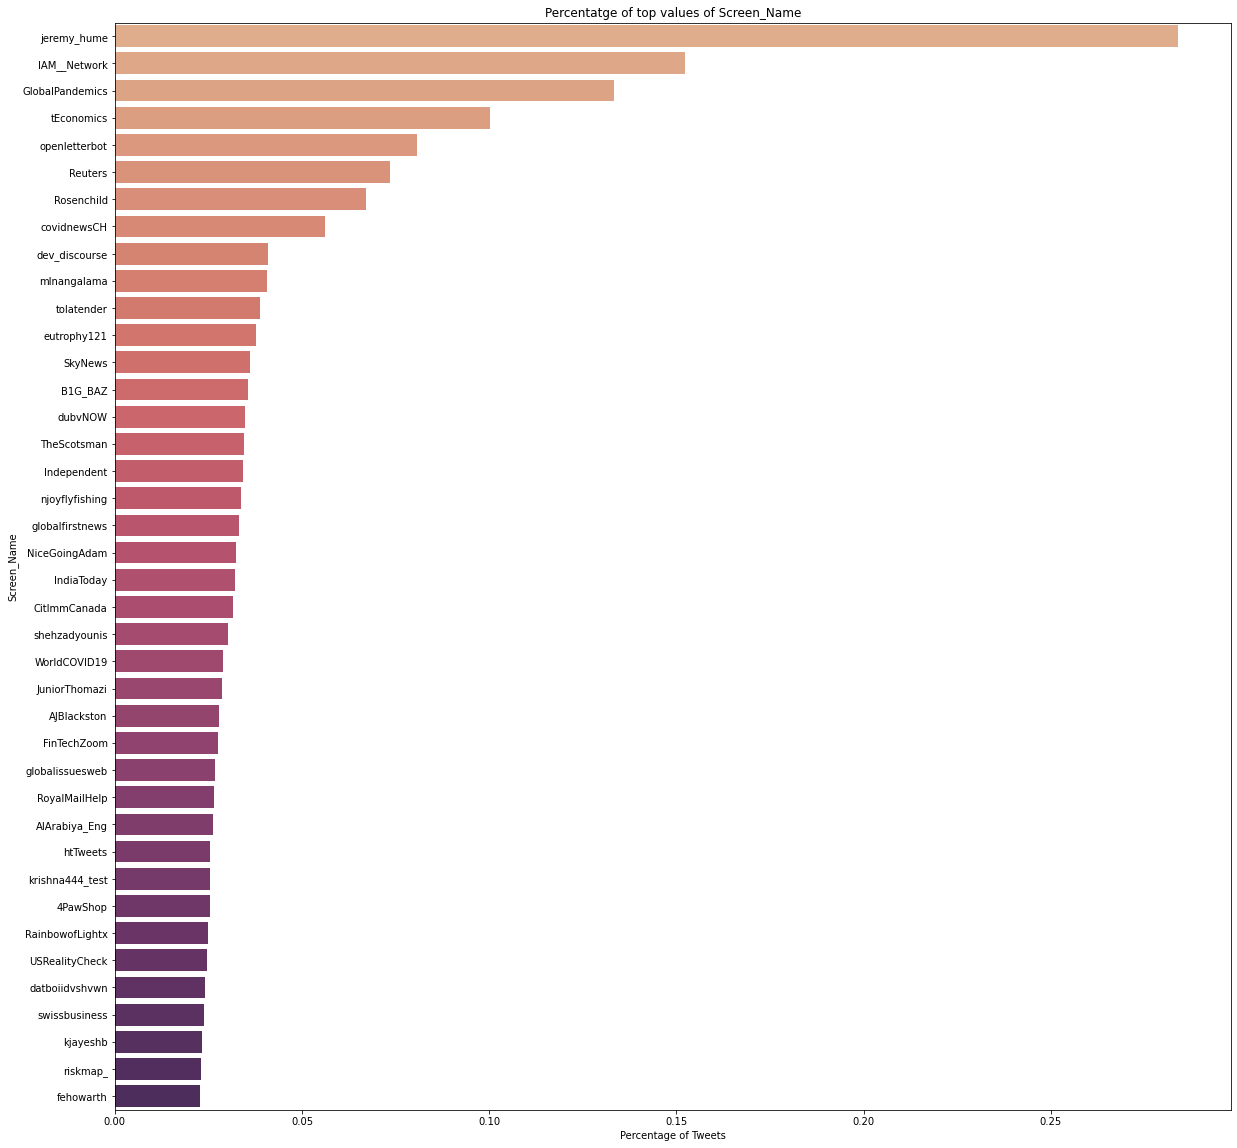

        Screen_Name  Percentage of Tweets
0       jeremy_hume              0.283809
1      IAM__Network              0.152358
2   GlobalPandemics              0.133377
3        tEconomics              0.100288
4     openletterbot              0.080684
5           Reuters              0.073545
6        Rosenchild              0.067142
7       covidnewsCH              0.056150
8     dev_discourse              0.040908
9       mlnangalama              0.040738
10       tolatender              0.038699
11      eutrophy121              0.037849
12          SkyNews              0.036149
13          B1G_BAZ              0.035469
14          dubvNOW              0.034902
15      TheScotsman              0.034449
16      Independent              0.034166
17   njoyflyfishing              0.033599
18  globalfirstnews              0.033316
19    NiceGoingAdam              0.032353
The number of unique values of  Name  is:  512398


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129516 missing from current font.
  fon

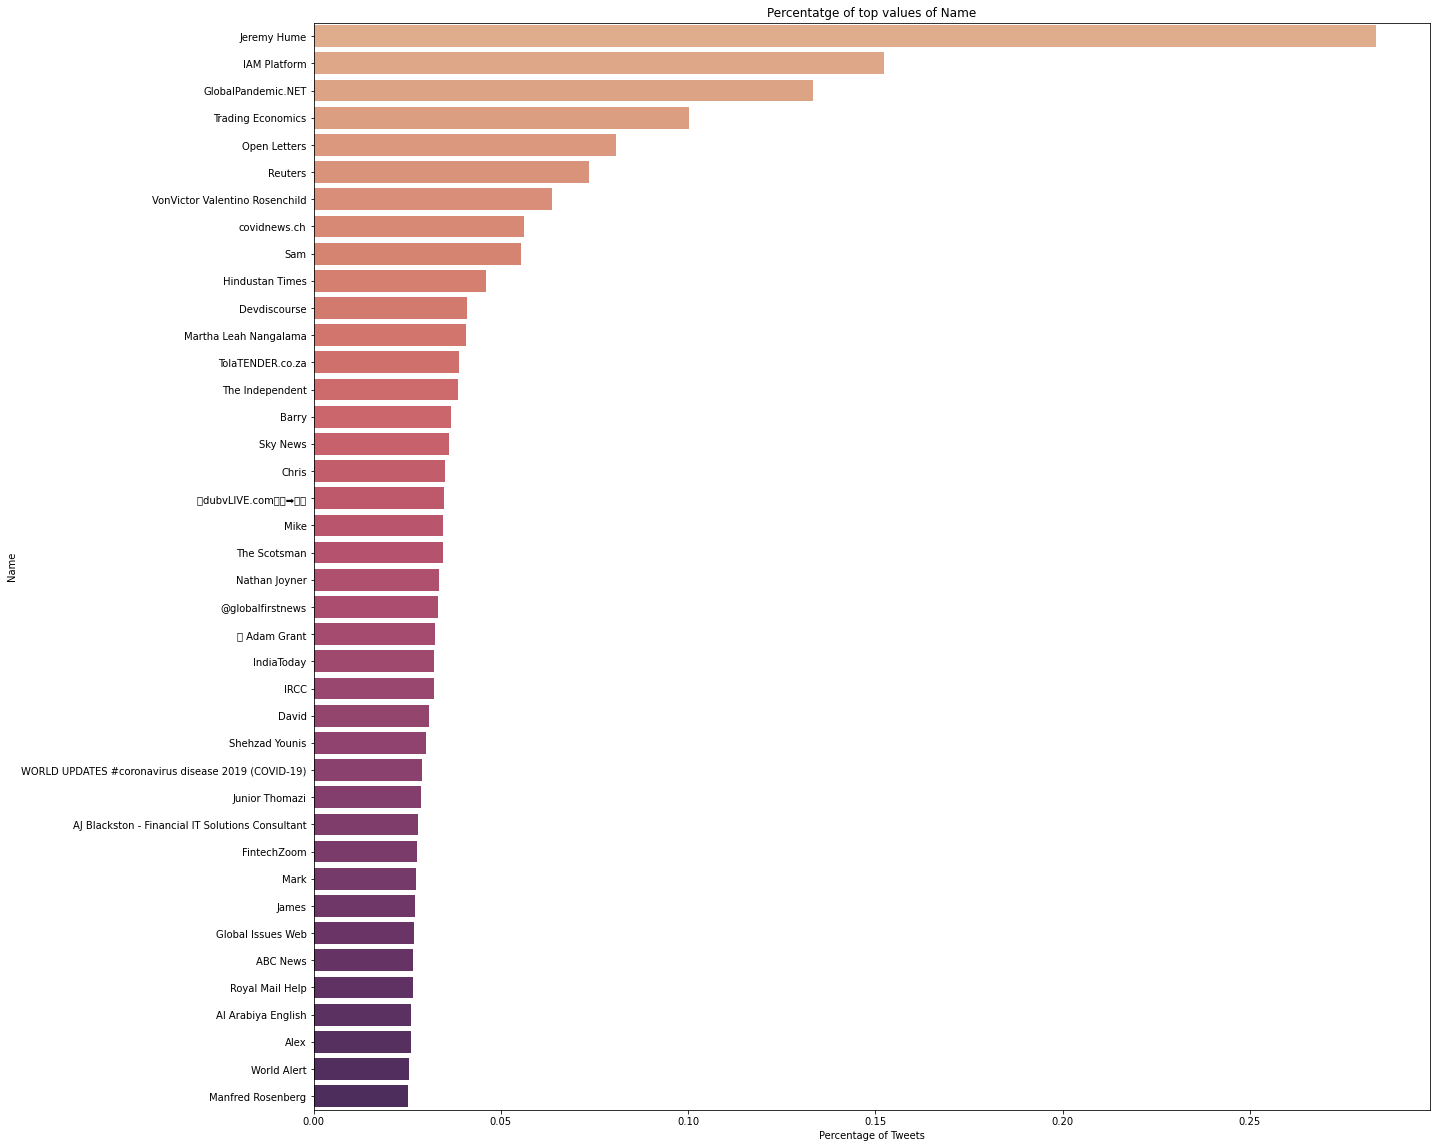

                              Name  Percentage of Tweets
0                      Jeremy Hume              0.283809
1                     IAM Platform              0.152358
2               GlobalPandemic.NET              0.133377
3                Trading Economics              0.100288
4                     Open Letters              0.080684
5                          Reuters              0.073545
6   VonVictor Valentino Rosenchild              0.063686
7                     covidnews.ch              0.056150
8                              Sam              0.055413
9                  Hindustan Times              0.045951
10                    Devdiscourse              0.040908
11           Martha Leah Nangalama              0.040738
12                TolaTENDER.co.za              0.038699
13                 The Independent              0.038529
14                           Barry              0.036602
15                        Sky News              0.036149
16                           Ch

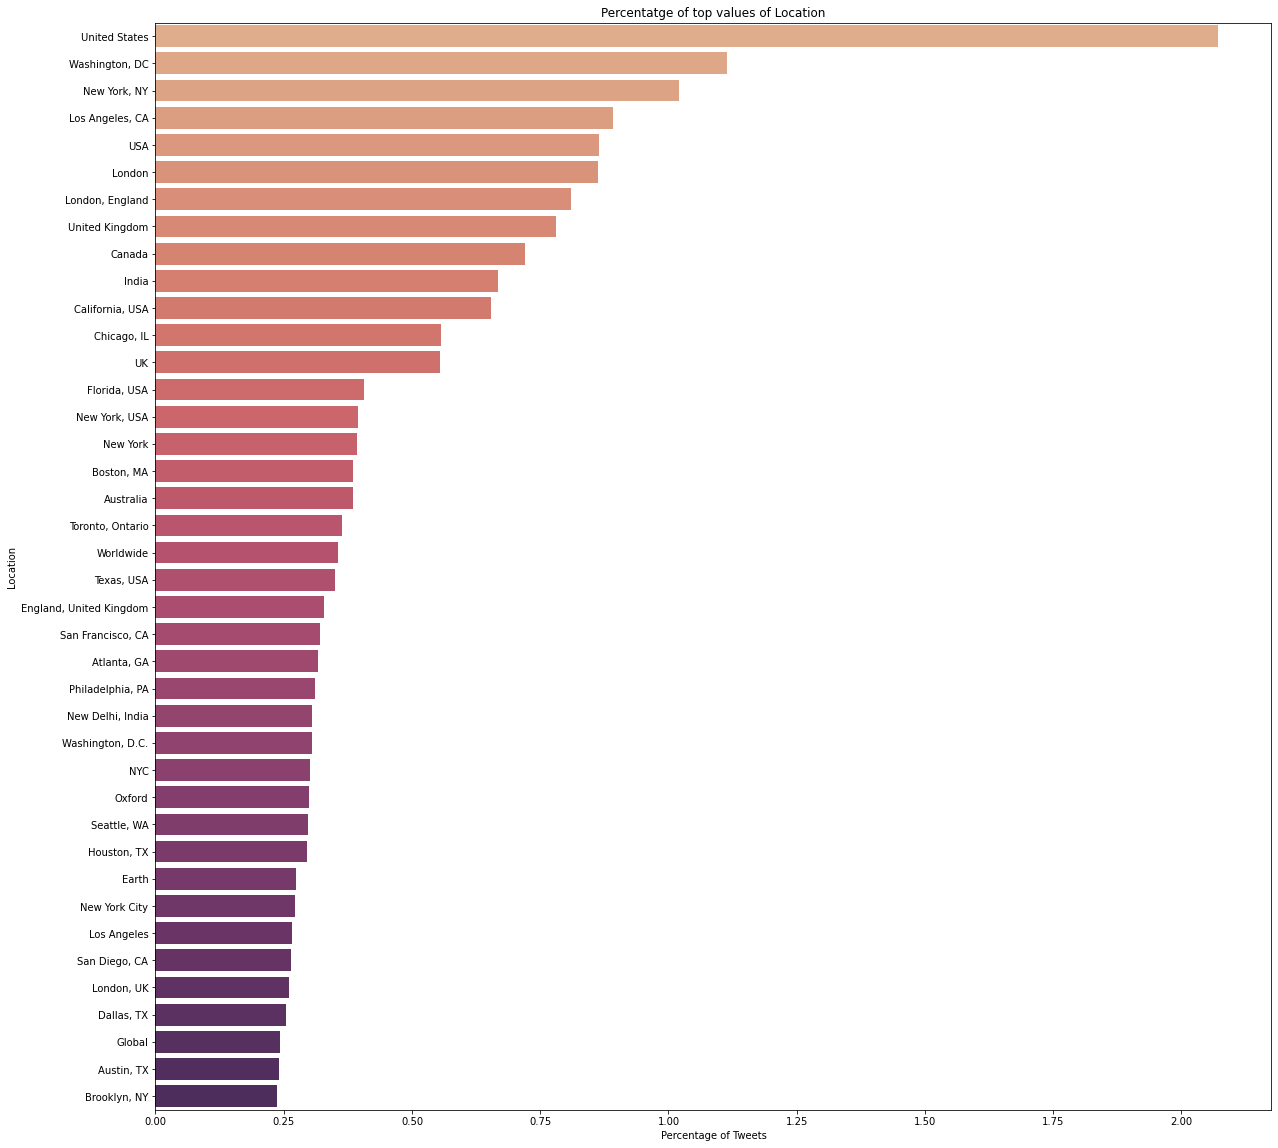

            Location  Percentage of Tweets
0      United States              2.071825
1     Washington, DC              1.113933
2       New York, NY              1.020558
3    Los Angeles, CA              0.891430
4                USA              0.864687
5             London              0.863383
6    London, England              0.810803
7     United Kingdom              0.780603
8             Canada              0.719467
9              India              0.667057
10   California, USA              0.654535
11       Chicago, IL              0.556570
12                UK              0.555267
13      Florida, USA              0.405685
14     New York, USA              0.395713
15          New York              0.392483
16        Boston, MA              0.384551
17         Australia              0.384437
18  Toronto, Ontario              0.363870
19         Worldwide              0.356787
The number of unique values of  Verified  is:  2


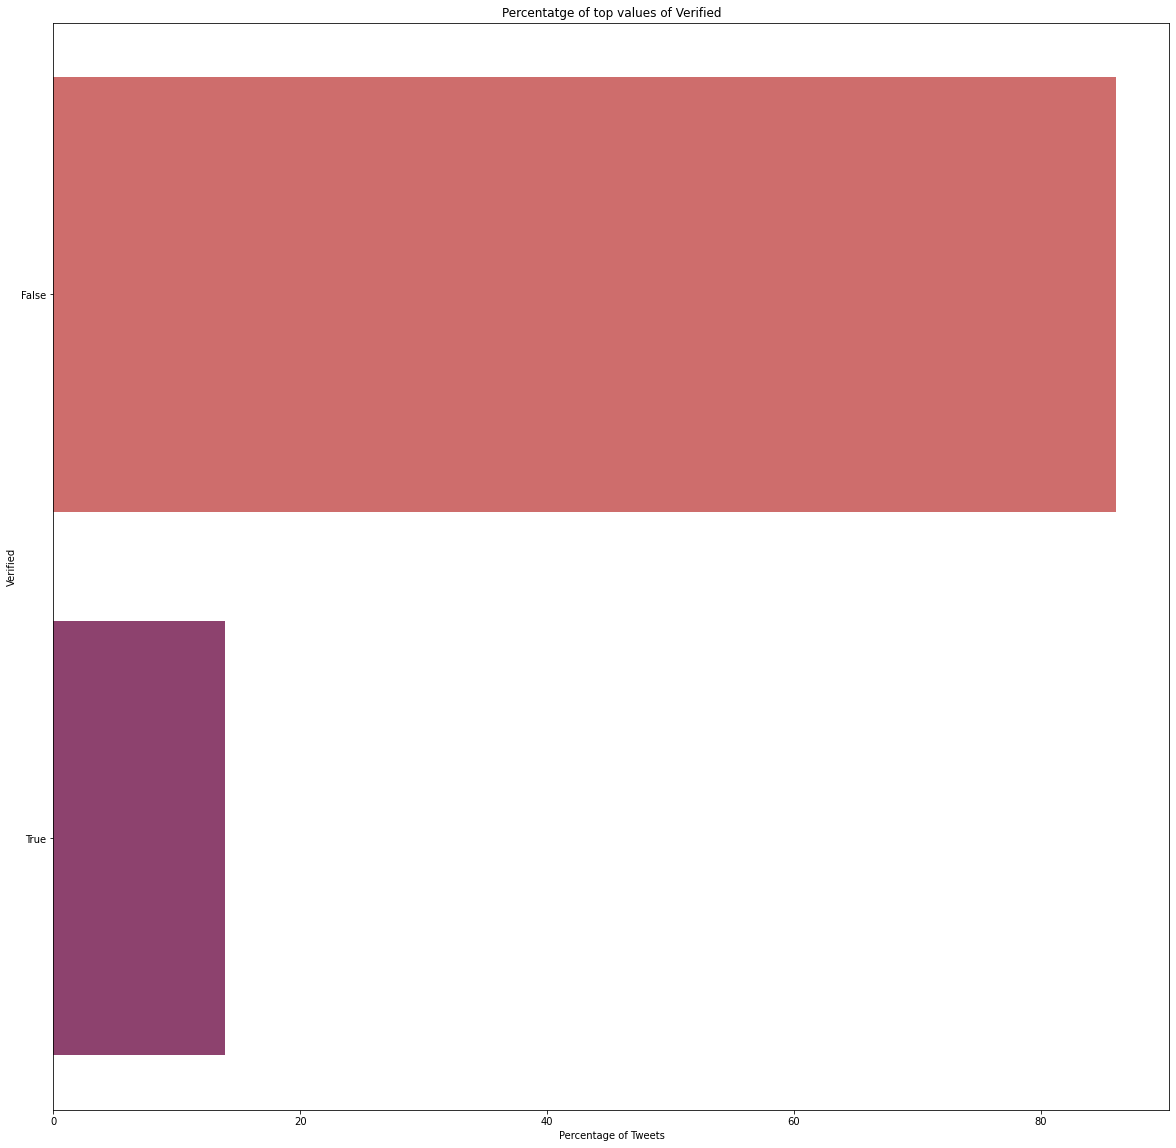

  Verified  Percentage of Tweets
0    False             86.135892
1     True             13.864108
The number of unique values of  Source  is:  2723


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_

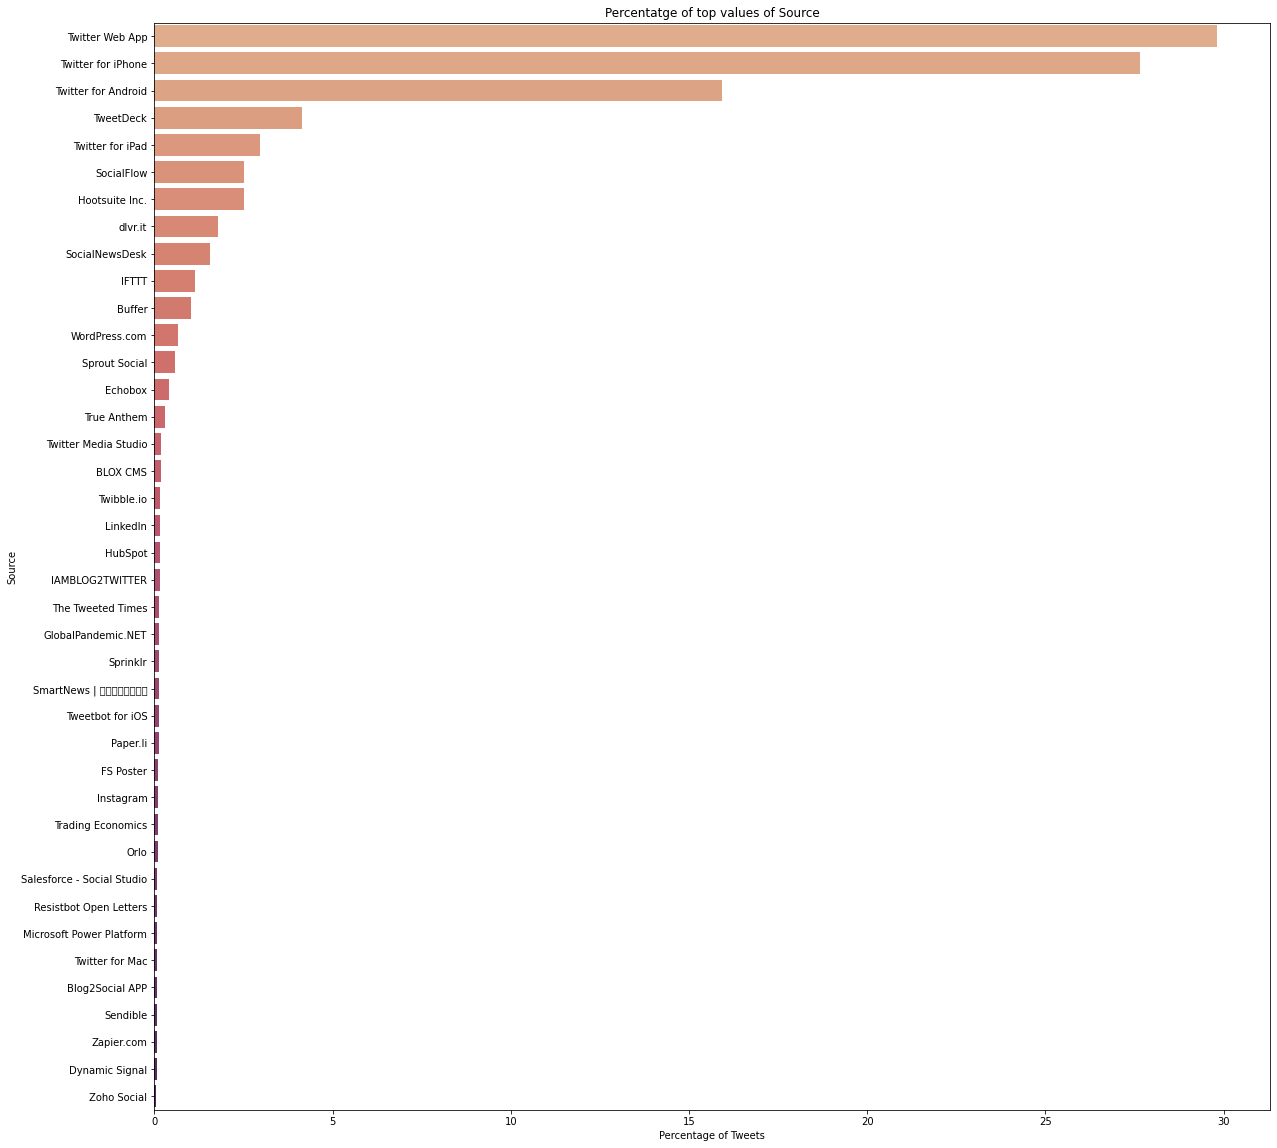

                  Source  Percentage of Tweets
0        Twitter Web App             29.817663
1     Twitter for iPhone             27.651555
2    Twitter for Android             15.928398
3              TweetDeck              4.138835
4       Twitter for iPad              2.966768
5             SocialFlow              2.513319
6         Hootsuite Inc.              2.509750
7                dlvr.it              1.788299
8         SocialNewsDesk              1.564153
9                  IFTTT              1.135974
10                Buffer              1.020048
11         WordPress.com              0.660258
12         Sprout Social              0.589036
13               Echobox              0.406308
14           True Anthem              0.295311
15  Twitter Media Studio              0.196440
16              BLOX CMS              0.193833
17            Twibble.io              0.163067
18              LinkedIn              0.161027
19               HubSpot              0.152585
The number of

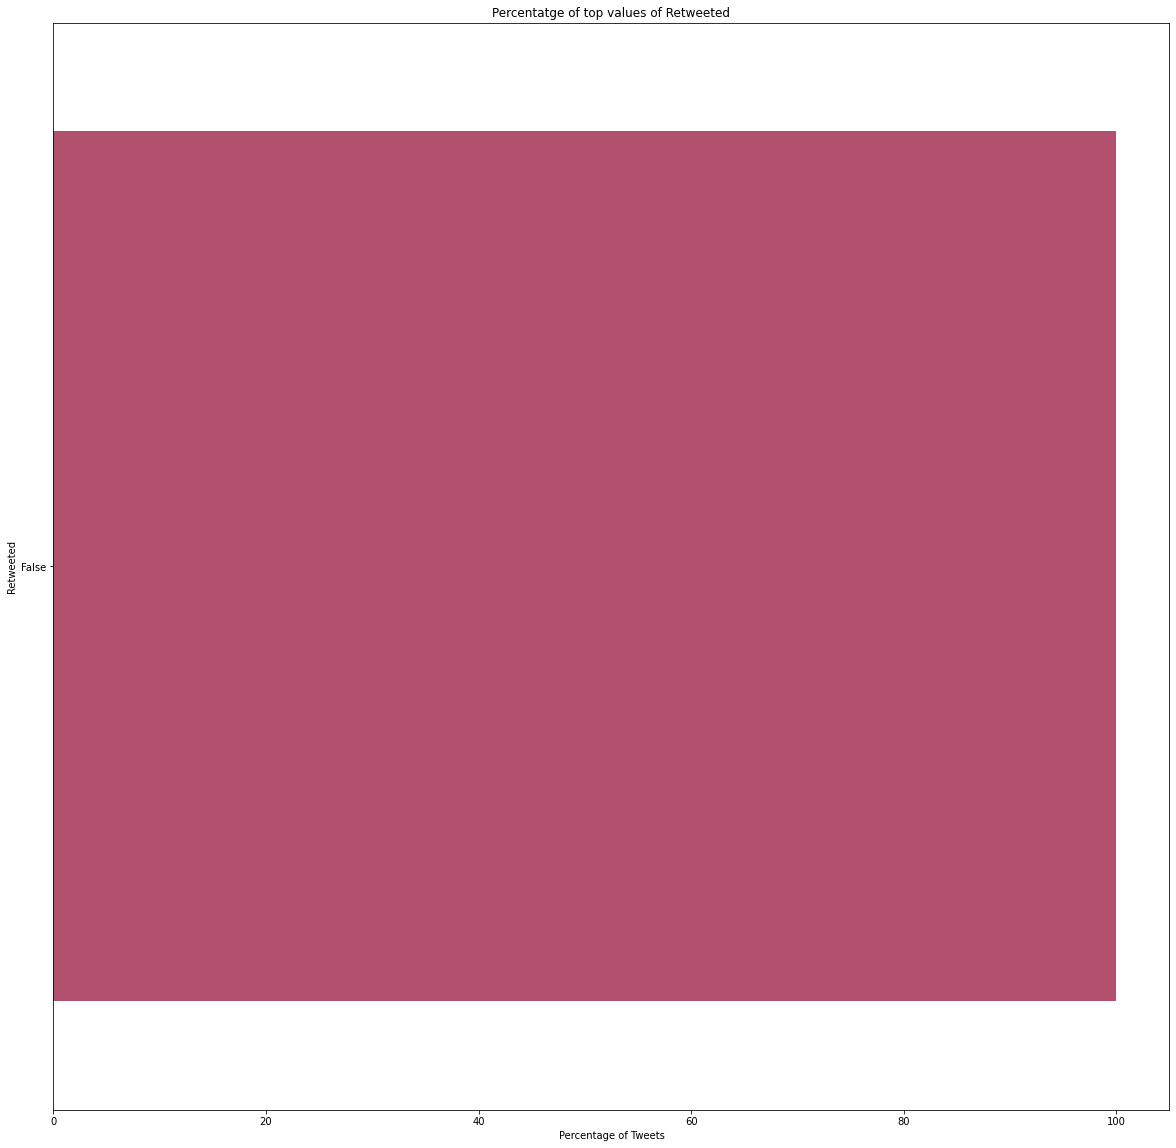

  Retweeted  Percentage of Tweets
0     False                 100.0
The number of unique values of  Weekday of Date  is:  7


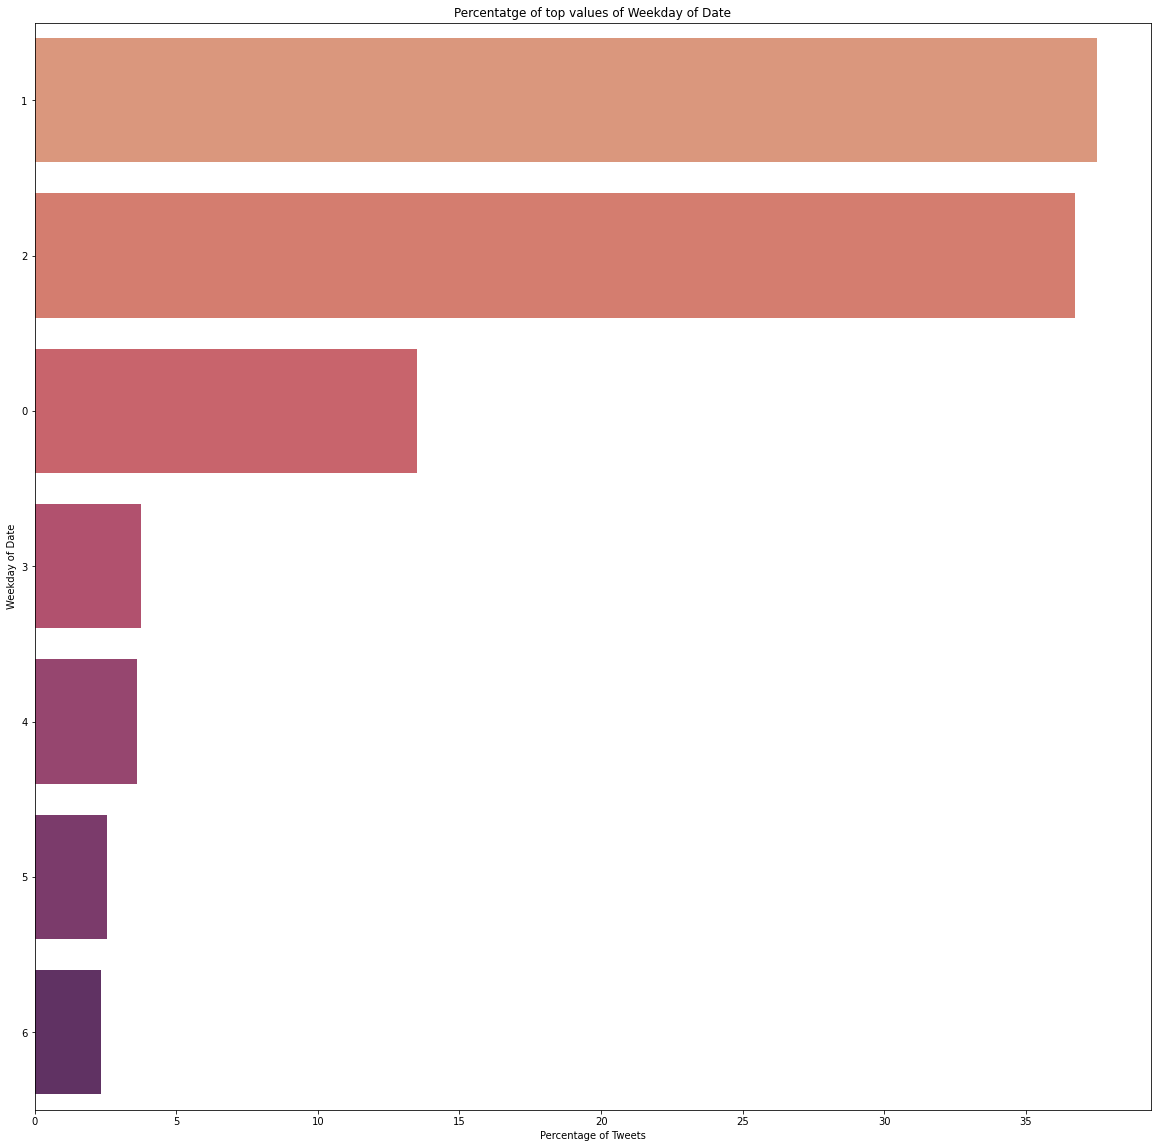

  Weekday of Date  Percentage of Tweets
0               1             37.522954
1               2             36.717307
2               0             13.505338
3               3              3.743349
4               4              3.609008
5               5              2.548618
6               6              2.353425


In [ ]:
for col in col_distribution: 
  repartition_in_percentage(col)

The number of unique values of  Screen_Name  is:  553980


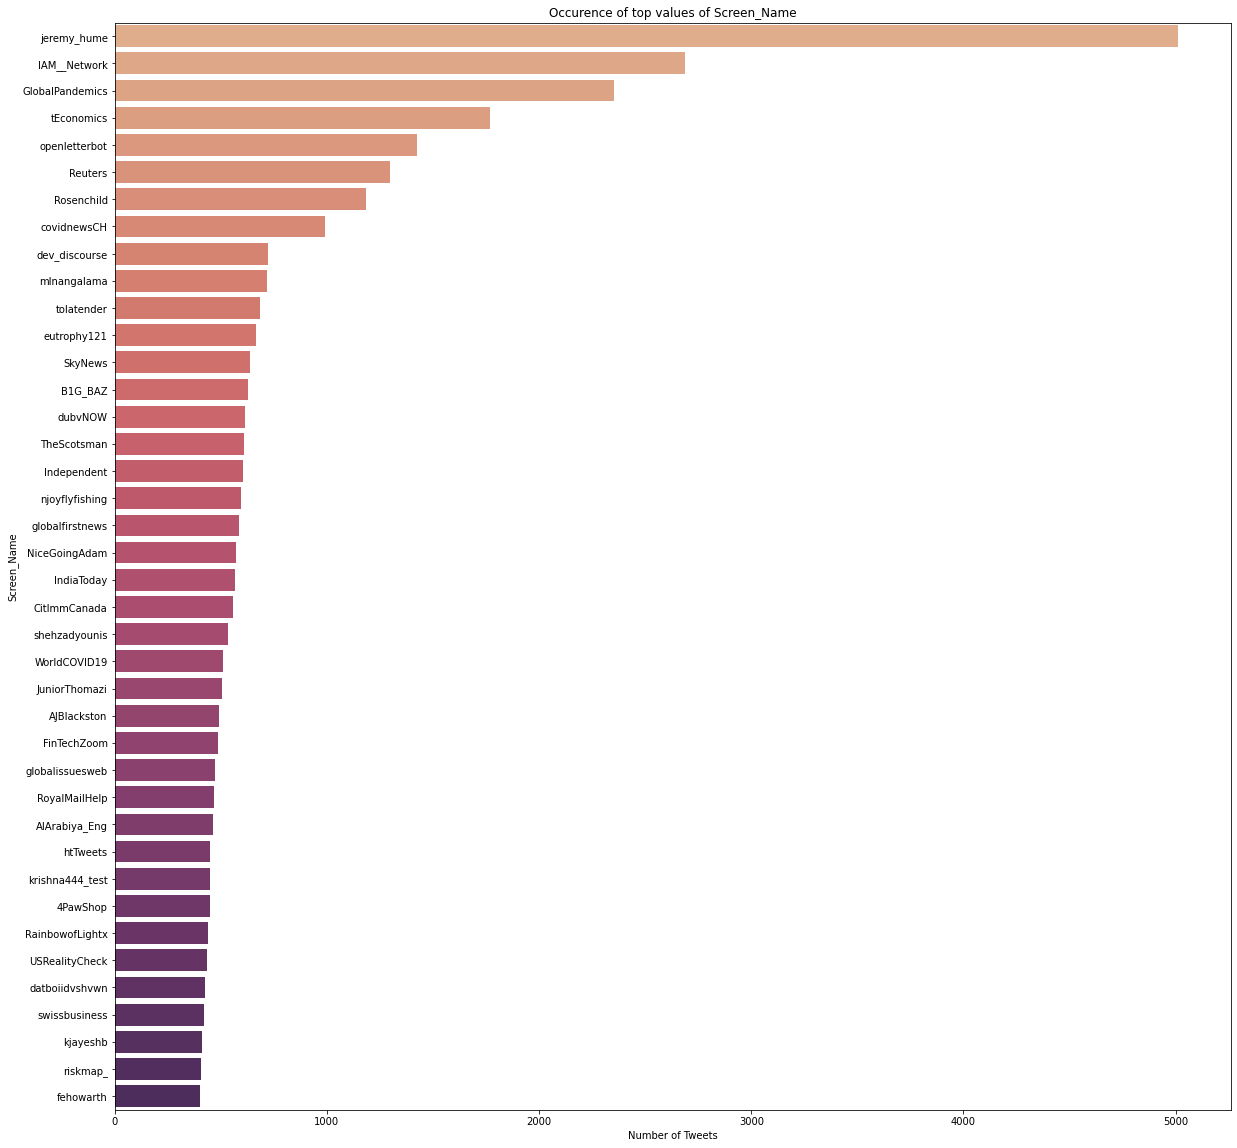

        Screen_Name  Number of Tweets
0       jeremy_hume              5009
1      IAM__Network              2689
2   GlobalPandemics              2354
3        tEconomics              1770
4     openletterbot              1424
5           Reuters              1298
6        Rosenchild              1185
7       covidnewsCH               991
8     dev_discourse               722
9       mlnangalama               719
10       tolatender               683
11      eutrophy121               668
12          SkyNews               638
13          B1G_BAZ               626
14          dubvNOW               616
15      TheScotsman               608
16      Independent               603
17   njoyflyfishing               593
18  globalfirstnews               588
19    NiceGoingAdam               571
The number of unique values of  Name  is:  512398


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129516 missing from current font.
  fon

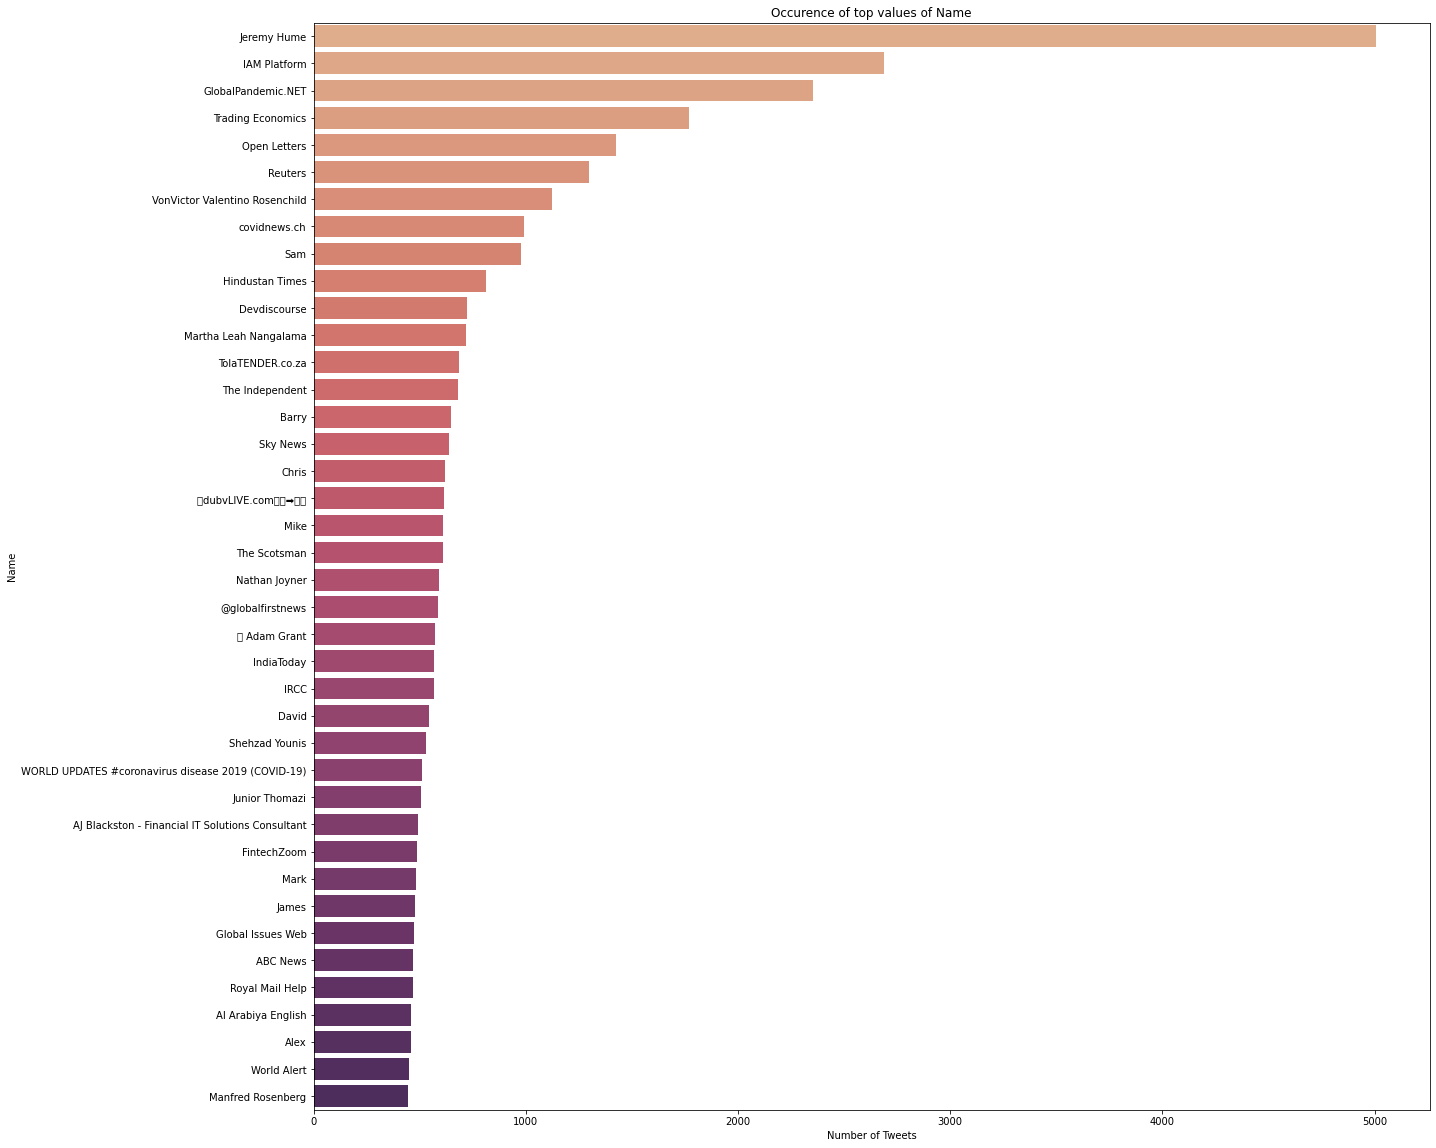

                              Name  Number of Tweets
0                      Jeremy Hume              5009
1                     IAM Platform              2689
2               GlobalPandemic.NET              2354
3                Trading Economics              1770
4                     Open Letters              1424
5                          Reuters              1298
6   VonVictor Valentino Rosenchild              1124
7                     covidnews.ch               991
8                              Sam               978
9                  Hindustan Times               811
10                    Devdiscourse               722
11           Martha Leah Nangalama               719
12                TolaTENDER.co.za               683
13                 The Independent               680
14                           Barry               646
15                        Sky News               638
16                           Chris               618
17            🗣️dubvLIVE.com🇺🇲➡️🌎🔊            

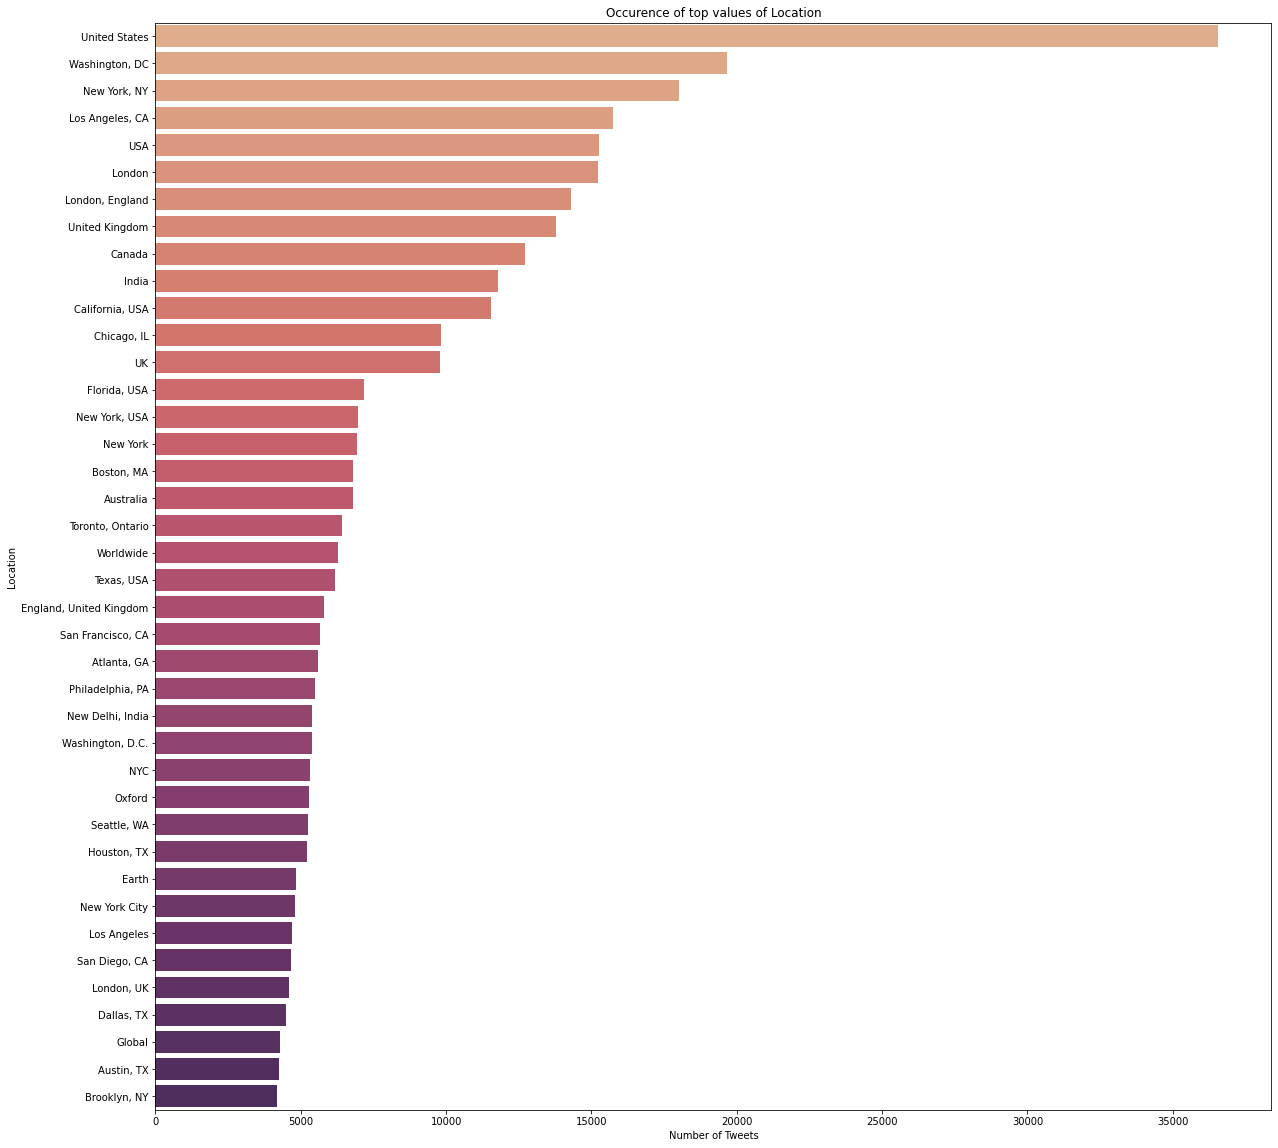

            Location  Number of Tweets
0      United States             36566
1     Washington, DC             19660
2       New York, NY             18012
3    Los Angeles, CA             15733
4                USA             15261
5             London             15238
6    London, England             14310
7     United Kingdom             13777
8             Canada             12698
9              India             11773
10   California, USA             11552
11       Chicago, IL              9823
12                UK              9800
13      Florida, USA              7160
14     New York, USA              6984
15          New York              6927
16        Boston, MA              6787
17         Australia              6785
18  Toronto, Ontario              6422
19         Worldwide              6297
The number of unique values of  Verified  is:  2


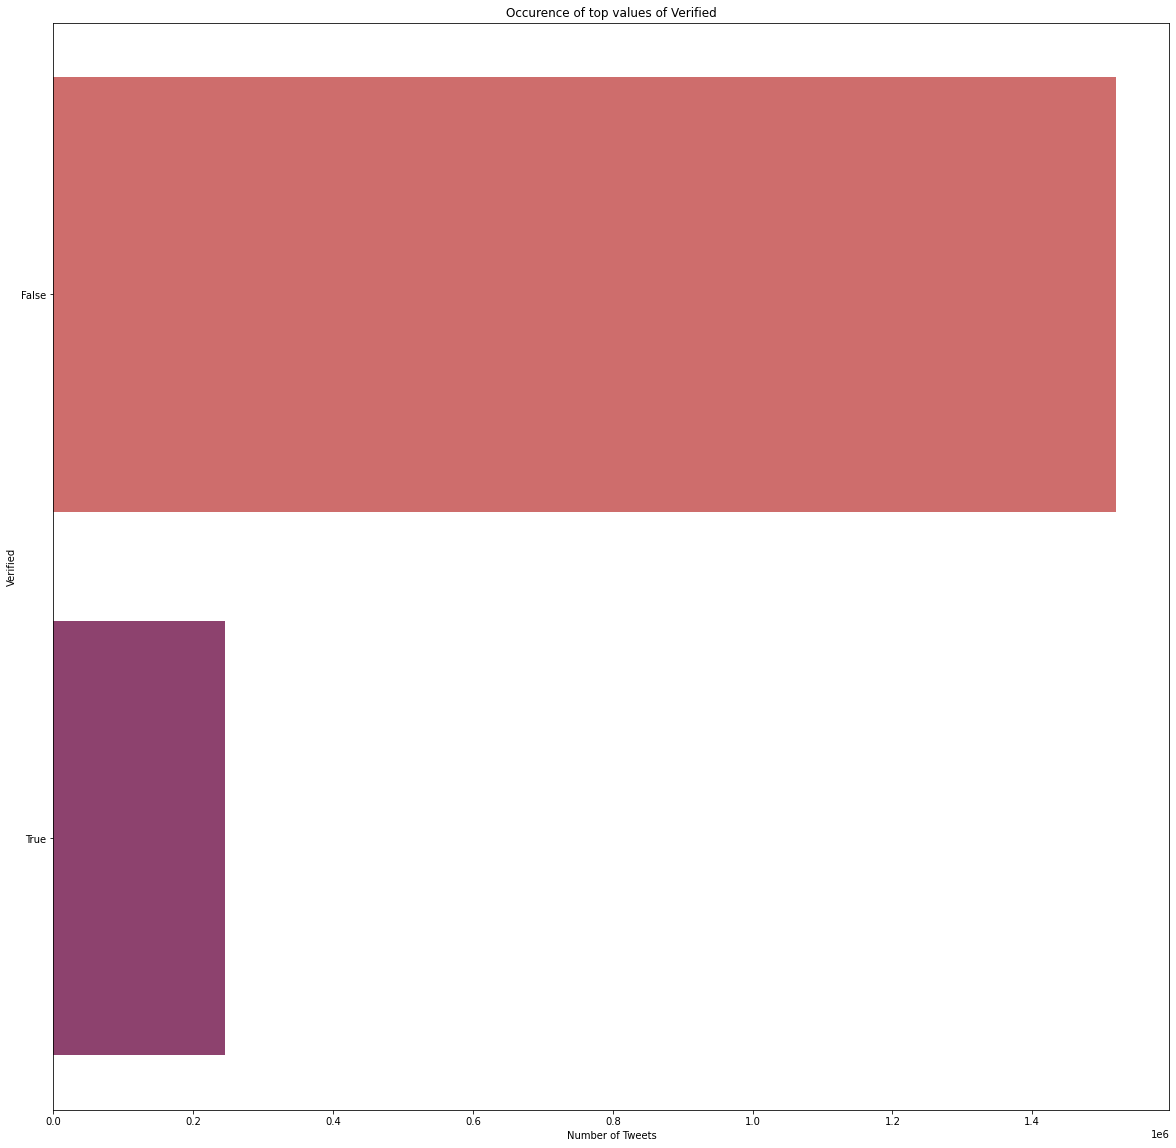

  Verified  Number of Tweets
0    False           1520227
1     True            244690
The number of unique values of  Source  is:  2723


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_

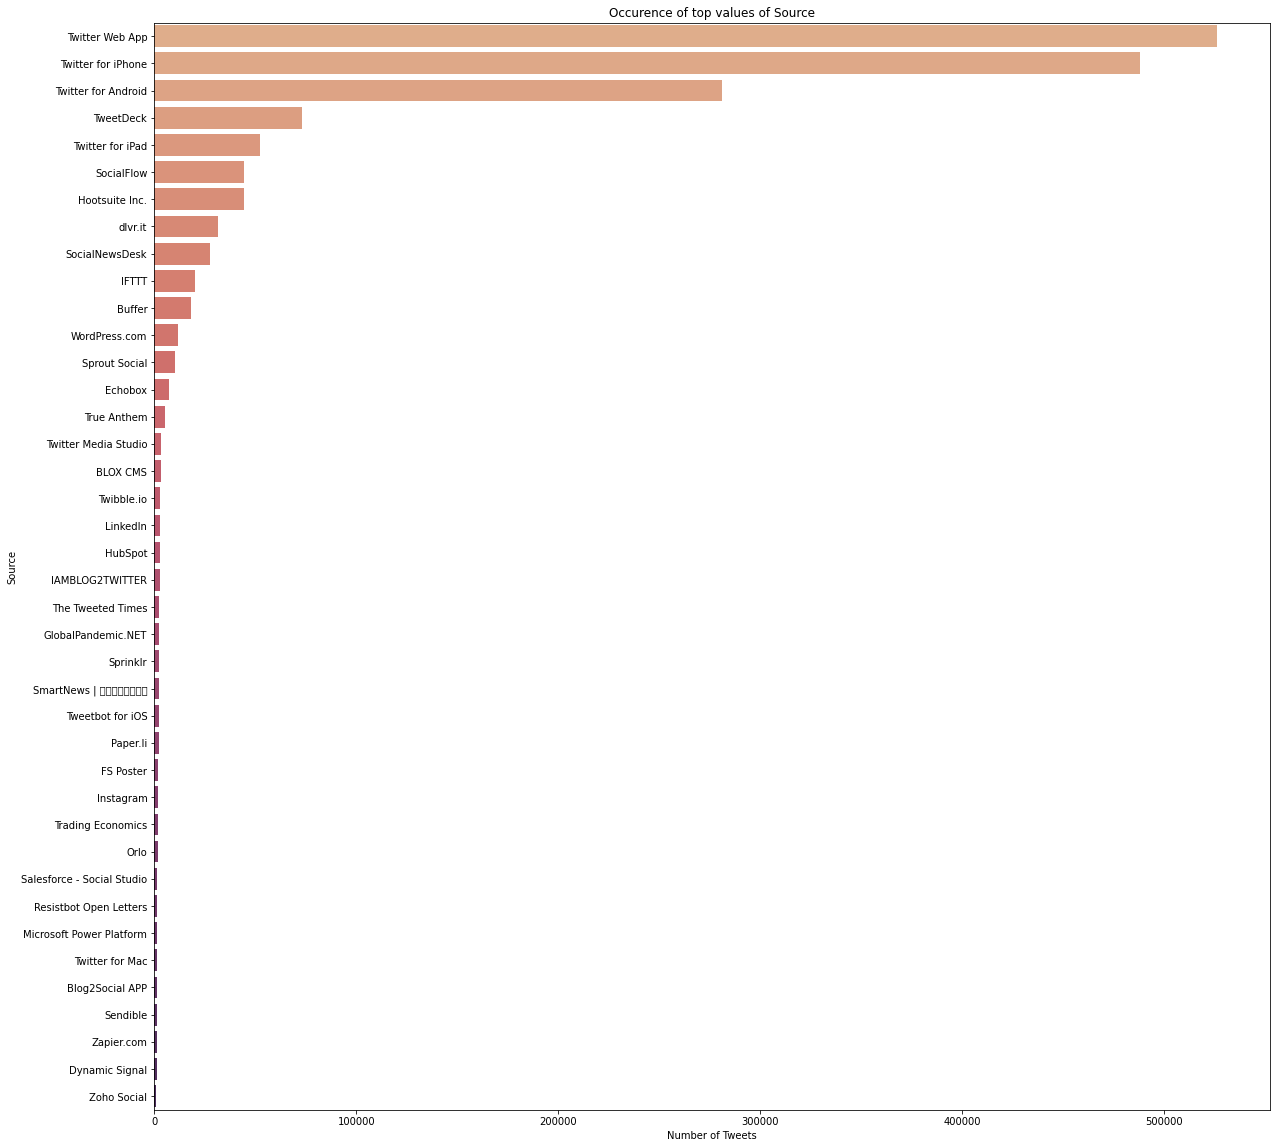

                  Source  Number of Tweets
0        Twitter Web App            526257
1     Twitter for iPhone            488027
2    Twitter for Android            281123
3              TweetDeck             73047
4       Twitter for iPad             52361
5             SocialFlow             44358
6         Hootsuite Inc.             44295
7                dlvr.it             31562
8         SocialNewsDesk             27606
9                  IFTTT             20049
10                Buffer             18003
11         WordPress.com             11653
12         Sprout Social             10396
13               Echobox              7171
14           True Anthem              5212
15  Twitter Media Studio              3467
16              BLOX CMS              3421
17            Twibble.io              2878
18              LinkedIn              2842
19               HubSpot              2693
The number of unique values of  Retweeted  is:  1


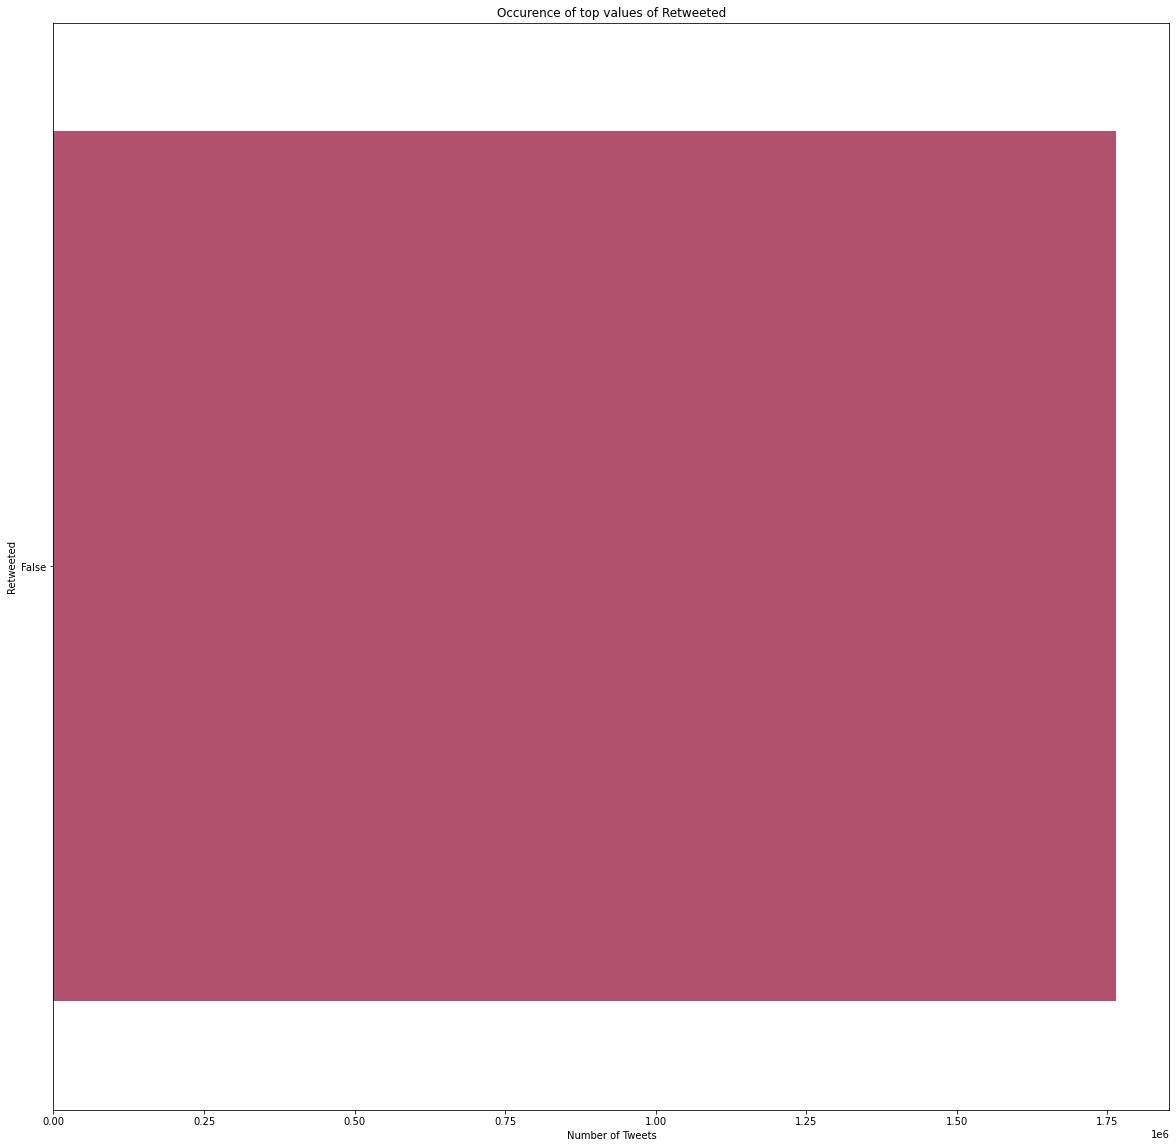

  Retweeted  Number of Tweets
0     False           1764917
The number of unique values of  Weekday of Date  is:  7


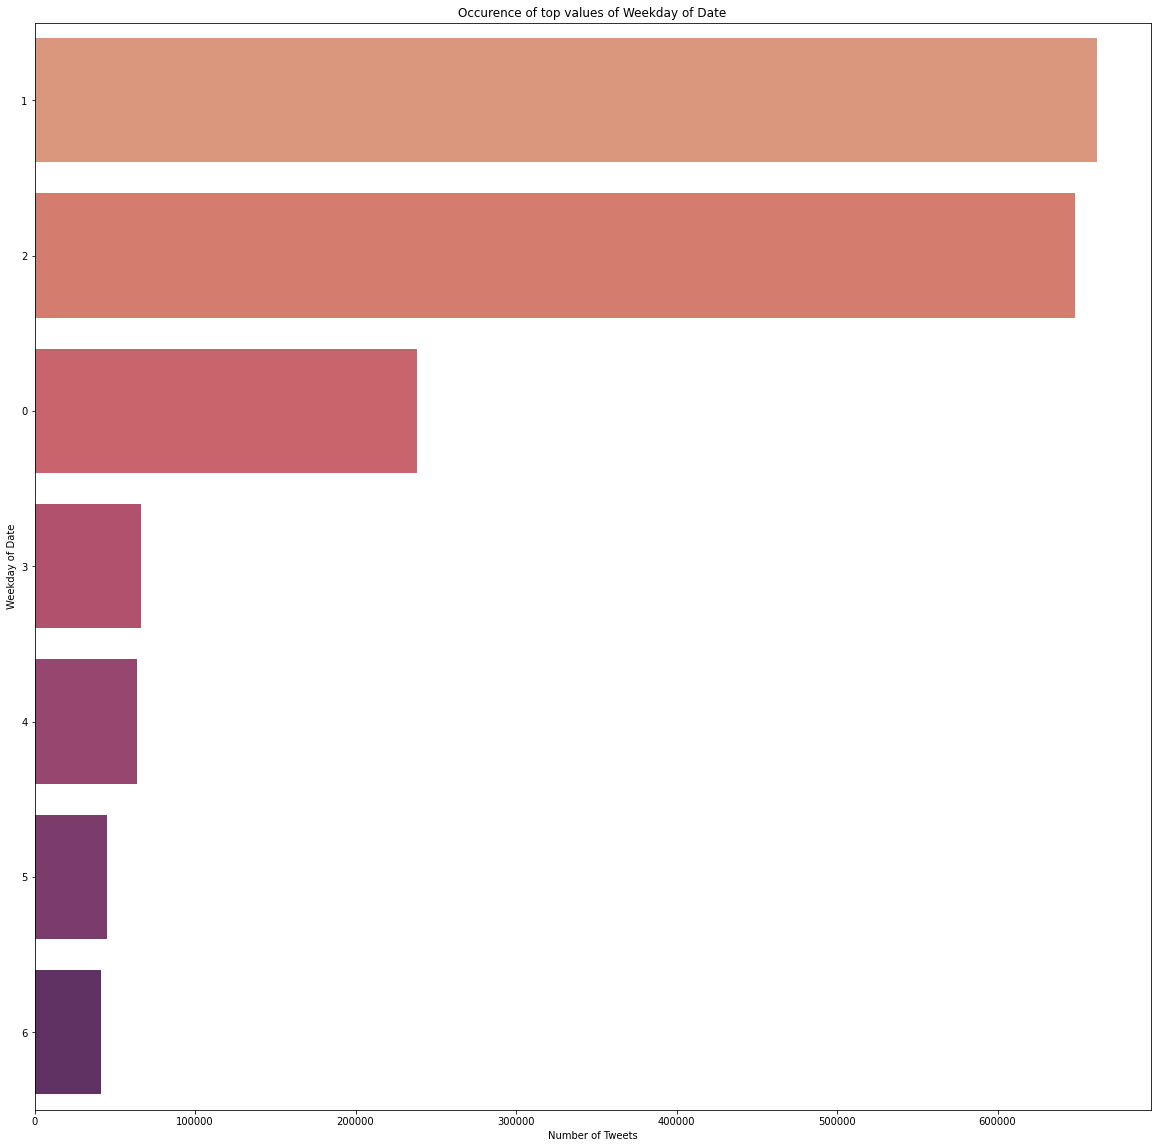

  Weekday of Date  Number of Tweets
0               1            662249
1               2            648030
2               0            238358
3               3             66067
4               4             63696
5               5             44981
6               6             41536


In [ ]:
for col in col_distribution:
  repartition(col)

## B. Analysis of numerical features

##### Definition of functions

In [ ]:
def distributions():
  numeric_columns = df._get_numeric_data().columns
  for f in numeric_columns: 
    plt.figure(figsize=(10,5))
    sns.kdeplot(data = df, x = f, color="pink", bw_adjust=5, fill=True)
    plt.title('Distribution of '+f)
    plt.show()


In [ ]:
def box_plots(df):
  numeric_columns = df._get_numeric_data().columns
  for f in numeric_columns: 
    sns.boxplot(x = f , data = df, palette = "flare");
    plt.title("Repartition of "+ f)
    plt.show()
    print("The detailed description is the following")
    print(df[f].describe())
    print()

### Distribiutions of numeric features 

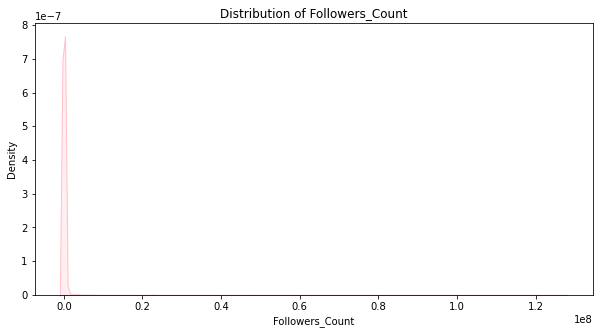

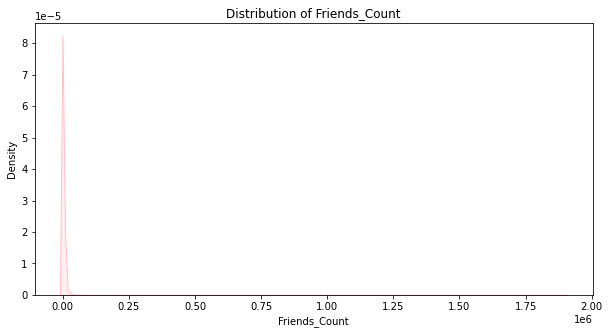

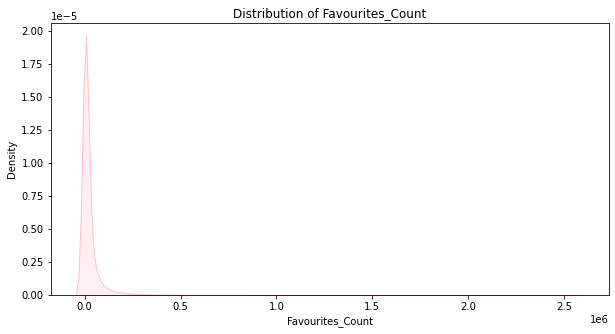

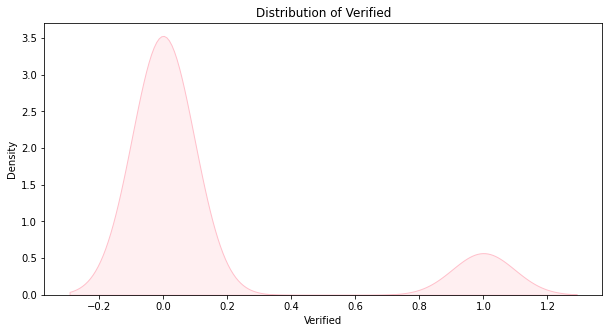

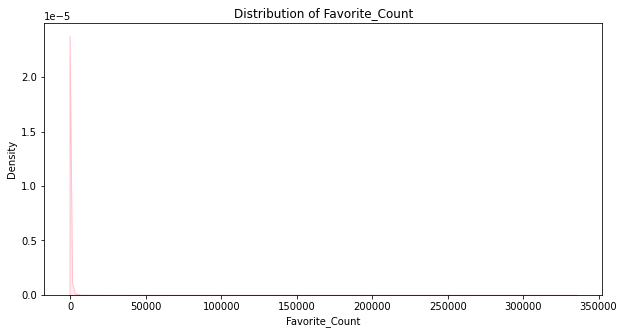

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


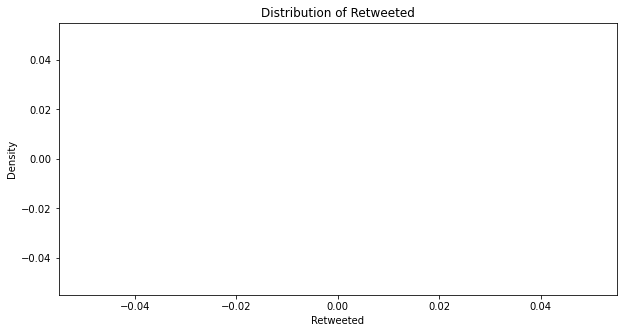

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


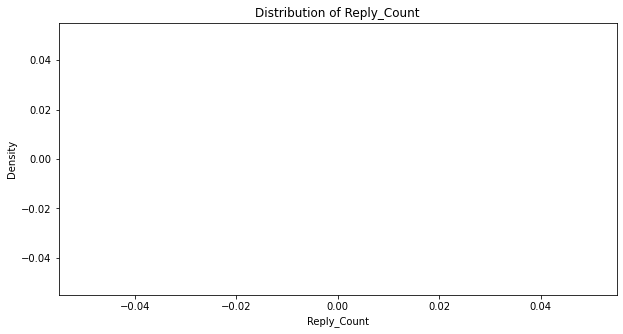

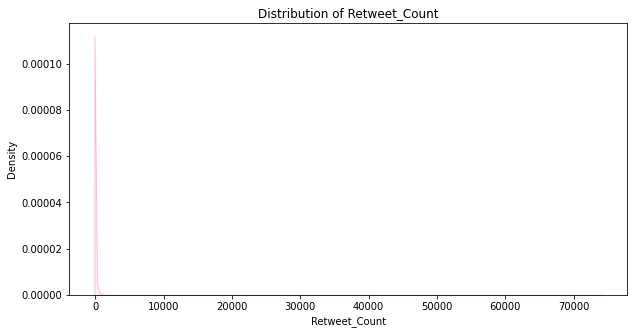

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


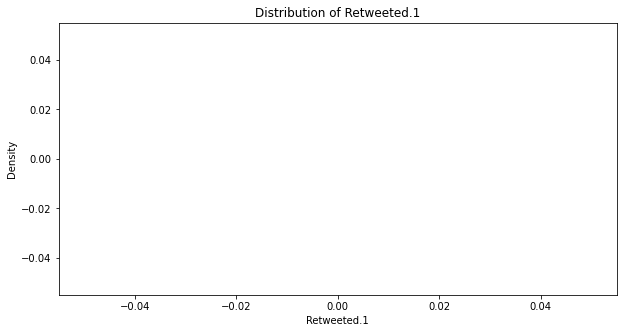

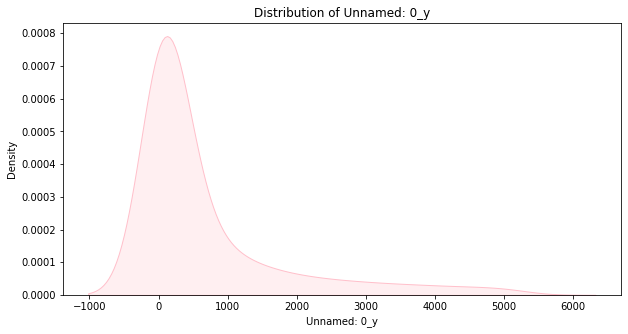

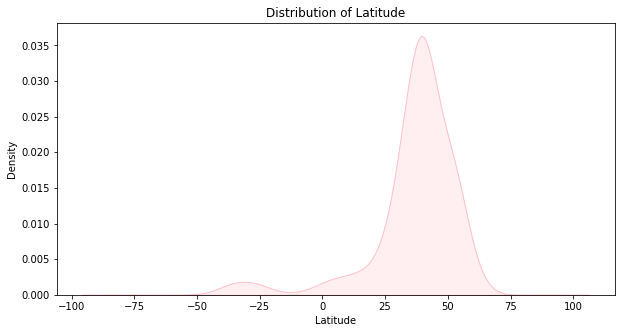

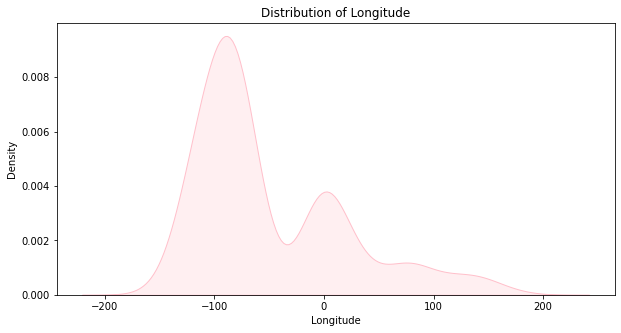

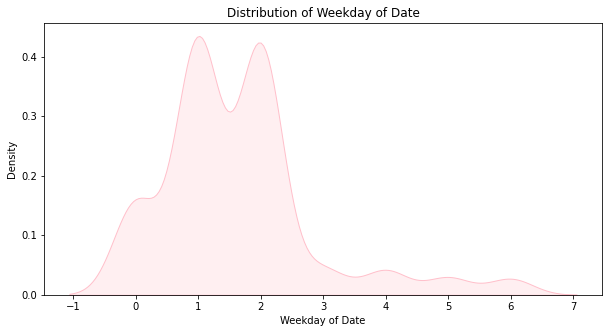

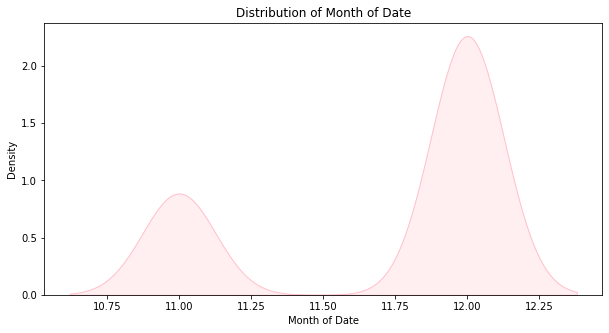

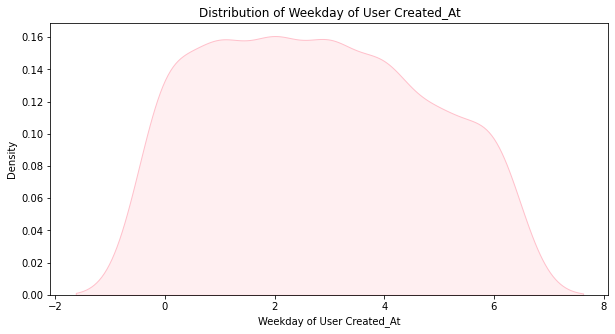

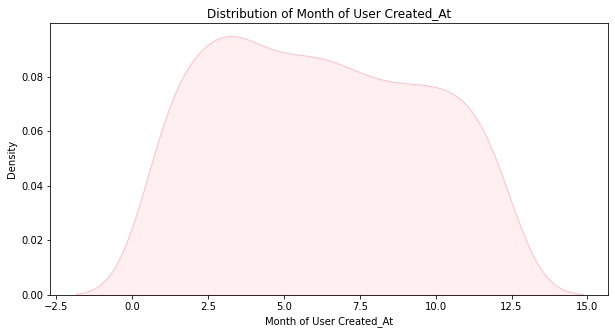

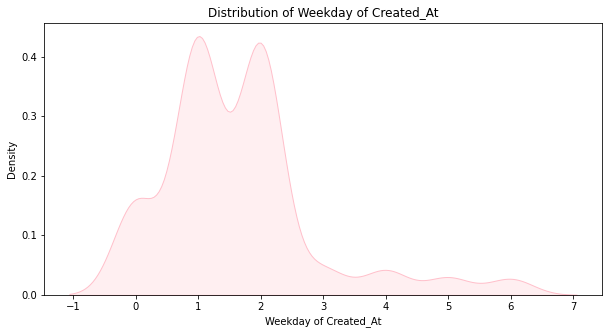

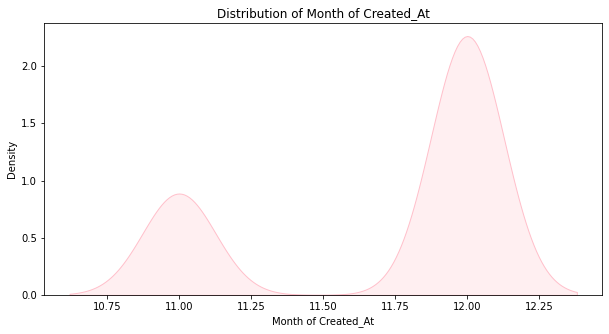

In [ ]:
distributions()

##### Boxplots of numeric features

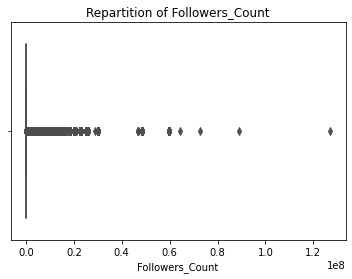

The detailed description is the following
count    1.764917e+06
mean     1.027216e+05
std      1.153894e+06
min      0.000000e+00
25%      2.220000e+02
50%      1.050000e+03
75%      5.343000e+03
max      1.270600e+08
Name: Followers_Count, dtype: float64



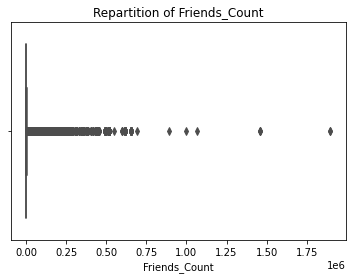

The detailed description is the following
count    1.764917e+06
mean     2.537532e+03
std      1.284156e+04
min      0.000000e+00
25%      2.530000e+02
50%      7.060000e+02
75%      1.908000e+03
max      1.896632e+06
Name: Friends_Count, dtype: float64



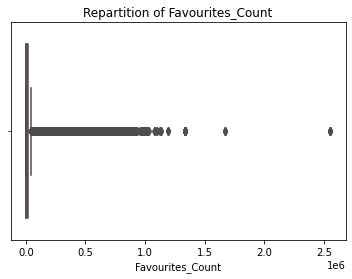

The detailed description is the following
count    1.764917e+06
mean     2.137906e+04
std      5.427805e+04
min      0.000000e+00
25%      6.160000e+02
50%      4.005000e+03
75%      1.807600e+04
max      2.554744e+06
Name: Favourites_Count, dtype: float64



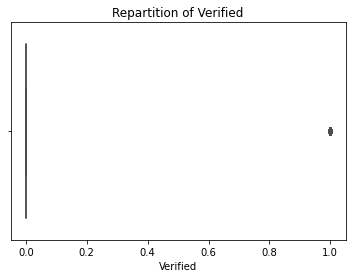

The detailed description is the following
count     1764917
unique          2
top         False
freq      1520227
Name: Verified, dtype: object



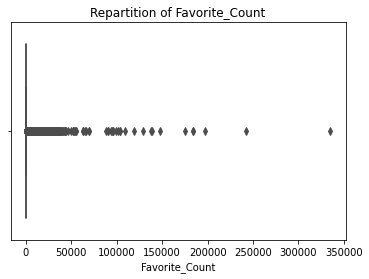

The detailed description is the following
count    1.764917e+06
mean     1.354005e+01
std      6.275416e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.350690e+05
Name: Favorite_Count, dtype: float64



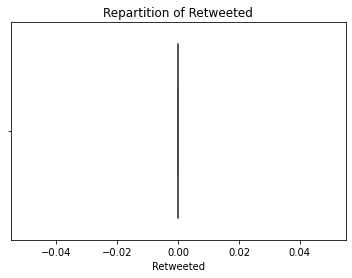

The detailed description is the following
count     1764917
unique          1
top         False
freq      1764917
Name: Retweeted, dtype: object



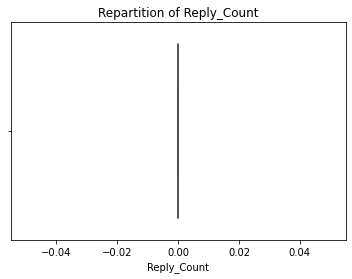

The detailed description is the following
count    1764917.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Reply_Count, dtype: float64



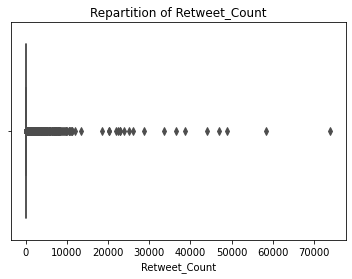

The detailed description is the following
count    1.764917e+06
mean     2.793678e+00
std      1.329558e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.399300e+04
Name: Retweet_Count, dtype: float64



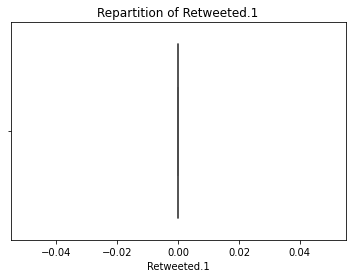

The detailed description is the following
count     1764917
unique          1
top         False
freq      1764917
Name: Retweeted.1, dtype: object



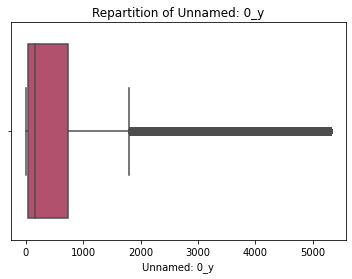

The detailed description is the following
count    1.189139e+06
mean     6.713358e+02
std      1.113235e+03
min      0.000000e+00
25%      2.800000e+01
50%      1.510000e+02
75%      7.390000e+02
max      5.304000e+03
Name: Unnamed: 0_y, dtype: float64



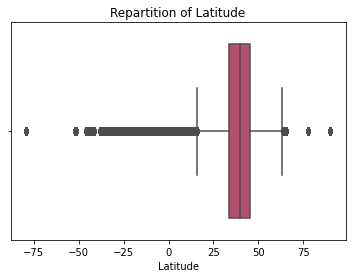

The detailed description is the following
count    1.189139e+06
mean     3.641599e+01
std      1.796544e+01
min     -7.940631e+01
25%      3.369565e+01
50%      3.978373e+01
75%      4.552025e+01
max      9.000000e+01
Name: Latitude, dtype: float64



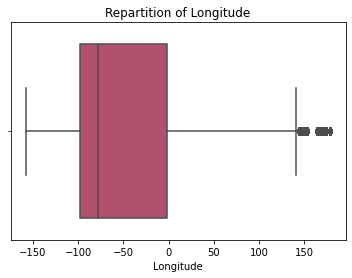

The detailed description is the following
count    1.189139e+06
mean    -4.978061e+01
std      6.892307e+01
min     -1.578557e+02
25%     -9.774370e+01
50%     -7.772788e+01
75%     -1.496729e+00
max      1.790123e+02
Name: Longitude, dtype: float64



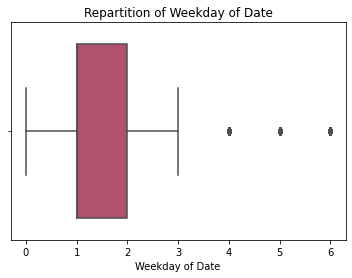

The detailed description is the following
count    1.764917e+06
mean     1.634873e+00
std      1.252934e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: Weekday of Date, dtype: float64



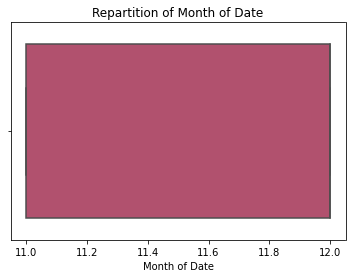

The detailed description is the following
count    1.764917e+06
mean     1.171855e+01
std      4.497069e-01
min      1.100000e+01
25%      1.100000e+01
50%      1.200000e+01
75%      1.200000e+01
max      1.200000e+01
Name: Month of Date, dtype: float64



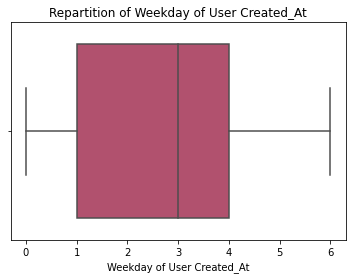

The detailed description is the following
count    1.764917e+06
mean     2.770372e+00
std      1.924769e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      6.000000e+00
Name: Weekday of User Created_At, dtype: float64



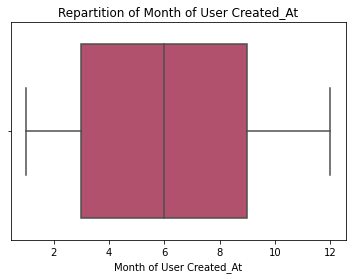

The detailed description is the following
count    1.764917e+06
mean     6.203934e+00
std      3.377189e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: Month of User Created_At, dtype: float64



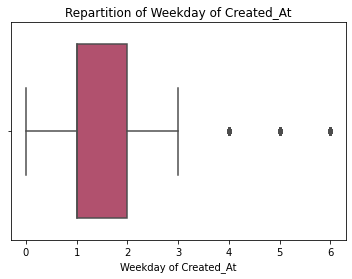

The detailed description is the following
count    1.764917e+06
mean     1.634873e+00
std      1.252934e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: Weekday of Created_At, dtype: float64



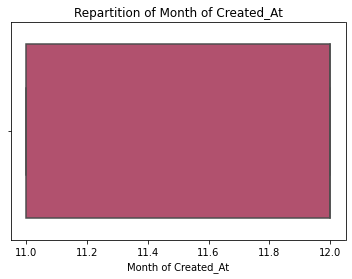

The detailed description is the following
count    1.764917e+06
mean     1.171855e+01
std      4.497069e-01
min      1.100000e+01
25%      1.100000e+01
50%      1.200000e+01
75%      1.200000e+01
max      1.200000e+01
Name: Month of Created_At, dtype: float64



In [ ]:
box_plots(df)

## C. Analysis of the popularity of the platform




### Tweets collected

##### Number of covid tweets collected per day

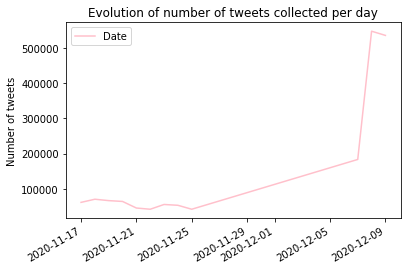

In [ ]:
pd.DataFrame(df['Date'].value_counts()).plot(color = 'pink')
plt.title("Evolution of number of tweets collected per day")
plt.ylabel("Number of tweets")
plt.show()

This graph does not show the real popularity of the platform, since the data used in this graph is only related to the data used in this study, which was collected. Even, if the number of tweets seem to increase we can not confirm the evolution of the interest in the subject, since we do not have access to all the data related to the subject. 
This comment is also to be taken into account for graphs bellow. 

##### Number of users interracting per day 

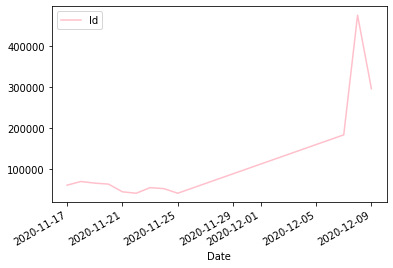

In [ ]:
nb_user_by_date = df.pivot_table(values = "Id", 
               index = ['Date'], 
               aggfunc = 'nunique')
nb_user_by_date.plot(color = 'pink')

##### Number of tweets per week day

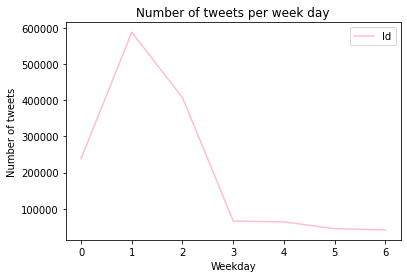

In [ ]:
df.pivot_table(values = "Id", 
               index = ['Weekday of Date'], 
               aggfunc = 'nunique').plot(color = 'pink')
plt.title("Number of tweets per week day") 
plt.ylabel("Number of tweets")
plt.xlabel("Weekday")
plt.show()

### Dates of creation of accounts

Even though the data collected only related to covid. The results of the analysis of the evolution of creation of accounts seem to be interesting and consistent in order to assess the popularity and the utilization of the platform. 

##### Evolution of the number of accounts created per day

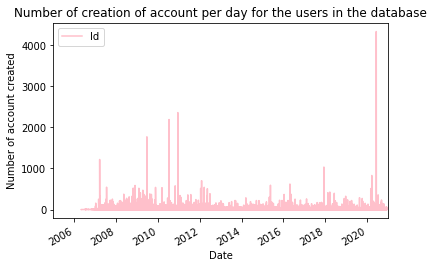

In [ ]:
nb_user_by_creation_date = df.pivot_table(values = "Id", 
               index = ['User Created_At'], 
               aggfunc = 'nunique')

nb_user_by_creation_date.plot(color = 'pink')
plt.xlim([datetime.date(2005, 1, 1), datetime.date(2021, 1, 1)])
plt.title("Number of creation of account per day for the users in the database") 
plt.ylabel("Number of account created")
plt.xlabel("Date")
plt.show()

##### Number of creation of account per month for the users in the database

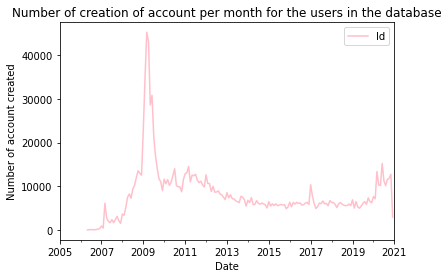

In [ ]:
df["Creation_Month"] = df['User Created_At'].dt.to_period('M')

nb_user_by_creation_date = df.pivot_table(values = "Id", 
               index = ['Creation_Month'], 
               aggfunc = 'nunique')

nb_user_by_creation_date.plot(color = 'pink')
plt.xlim([datetime.date(2005, 1, 1), datetime.date(2021, 1, 1)])
plt.title("Number of creation of account per month for the users in the database") 
plt.ylabel("Number of account created")
plt.xlabel("Date")
plt.show()

##### Number of creation of account per year for the users in the database

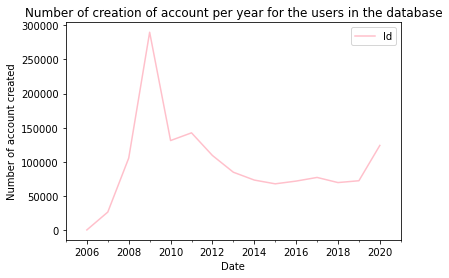

In [ ]:
df["Creation_year"] = df['User Created_At'].dt.to_period('Y')

nb_user_by_creation_date = df.pivot_table(values = "Id", 
               index = ['Creation_year'], 
               aggfunc = 'nunique')

nb_user_by_creation_date.plot(color = 'pink')
plt.xlim([datetime.date(2005, 1, 1), datetime.date(2021, 1, 1)])
plt.title("Number of creation of account per year for the users in the database") 
plt.ylabel("Number of account created")
plt.xlabel("Date")
plt.show()

##### Creation of accounts per week day 

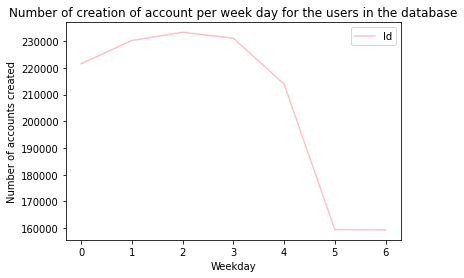

In [ ]:
df.pivot_table(values = "Id", 
               index = ['Weekday of User Created_At'], 
               aggfunc = 'nunique').plot(color = 'pink')
plt.title("Number of creation of account per week day for the users in the database") 
plt.ylabel("Number of accounts created")
plt.xlabel("Weekday")
plt.show()

## D. Analysis of the popularity of users

##### Users with the highest number of followers


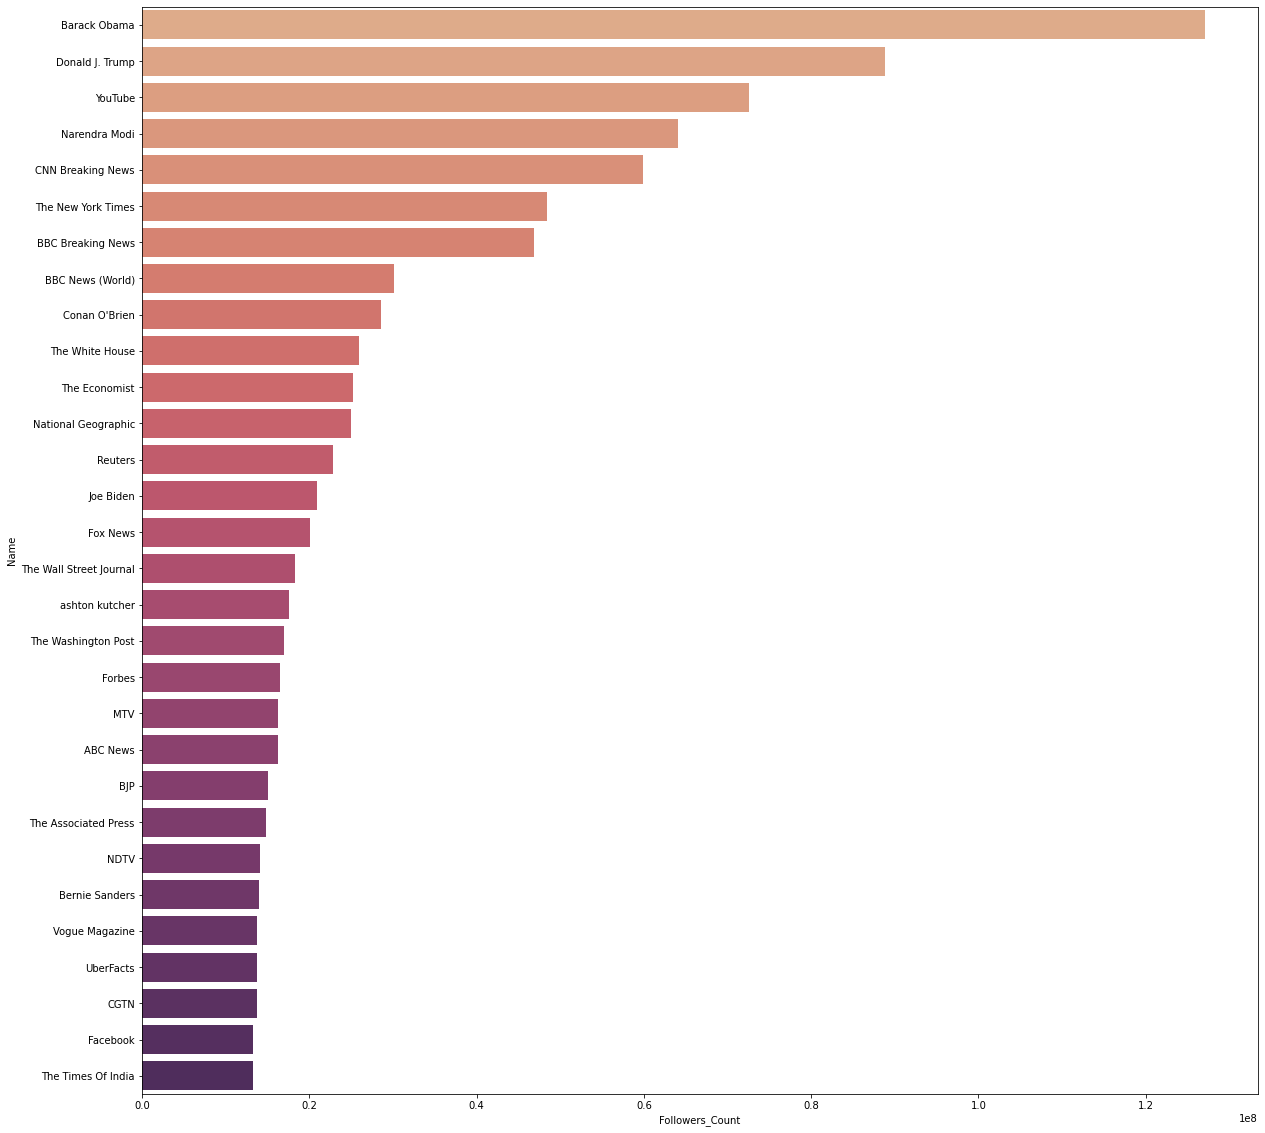

In [ ]:
fig = plt.figure(figsize=(20,20))
follower_by_user = df.pivot_table(values = "Followers_Count", 
               index = ['Name'], 
               aggfunc = 'max')
follower_by_user = follower_by_user.sort_values("Followers_Count", ascending= False).reset_index()
sns.barplot(x = 'Followers_Count',  y = 'Name', data = follower_by_user.head(30), palette = "flare");
plt.show()

Political figures, media, and social netwoorks seem to be the Twitter accounts that have the largest communities. 

##### Users with the highest number of friends

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129311 missing from current font.
  font.set_text(s, 0, flags=flags)


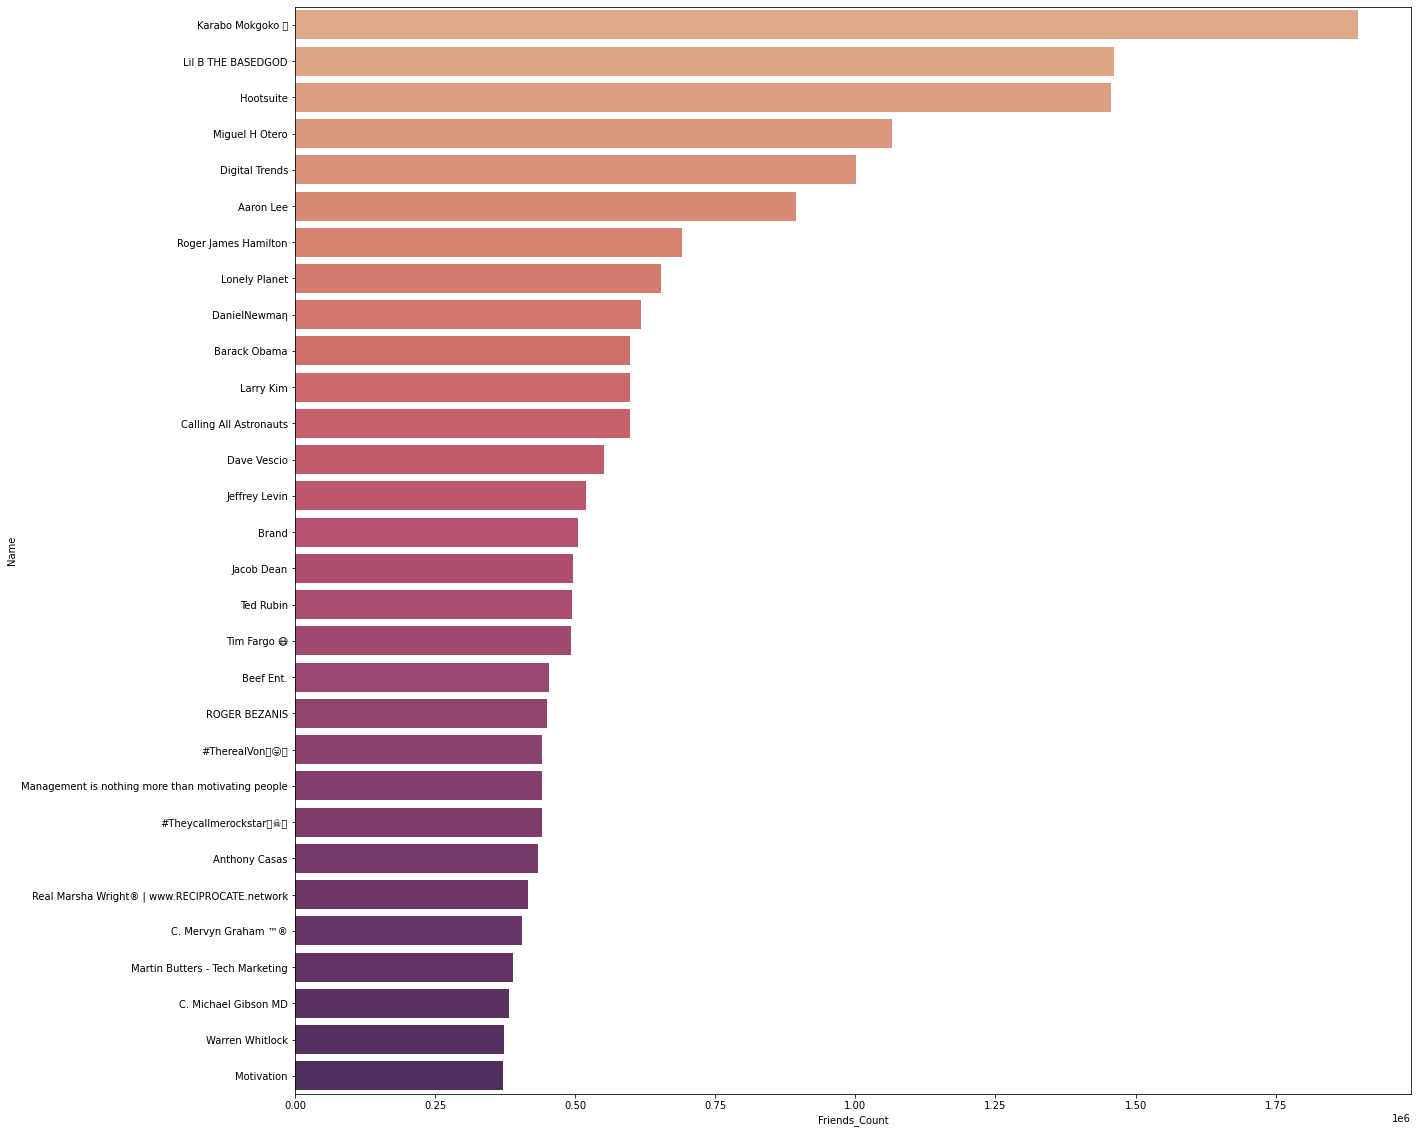

In [ ]:
fig = plt.figure(figsize=(20,20))
follower_by_user = df.pivot_table(values = "Friends_Count", 
               index = ['Name'], 
               aggfunc = 'max')
follower_by_user = follower_by_user.sort_values("Friends_Count", ascending= False).reset_index()
sns.barplot(x = 'Friends_Count',  y = 'Name', data = follower_by_user.head(30), palette = "flare");
plt.show()

We can see a difference between the figures that have the largest number of friends, or the largest number of followers. In fact, after checking some of these accounts, we can see that the majority of them belong to influencer, that are the new types of influencing figures among the young generation

##### Users with the highest number of favourites_count

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127475 missing from current font.
  fon

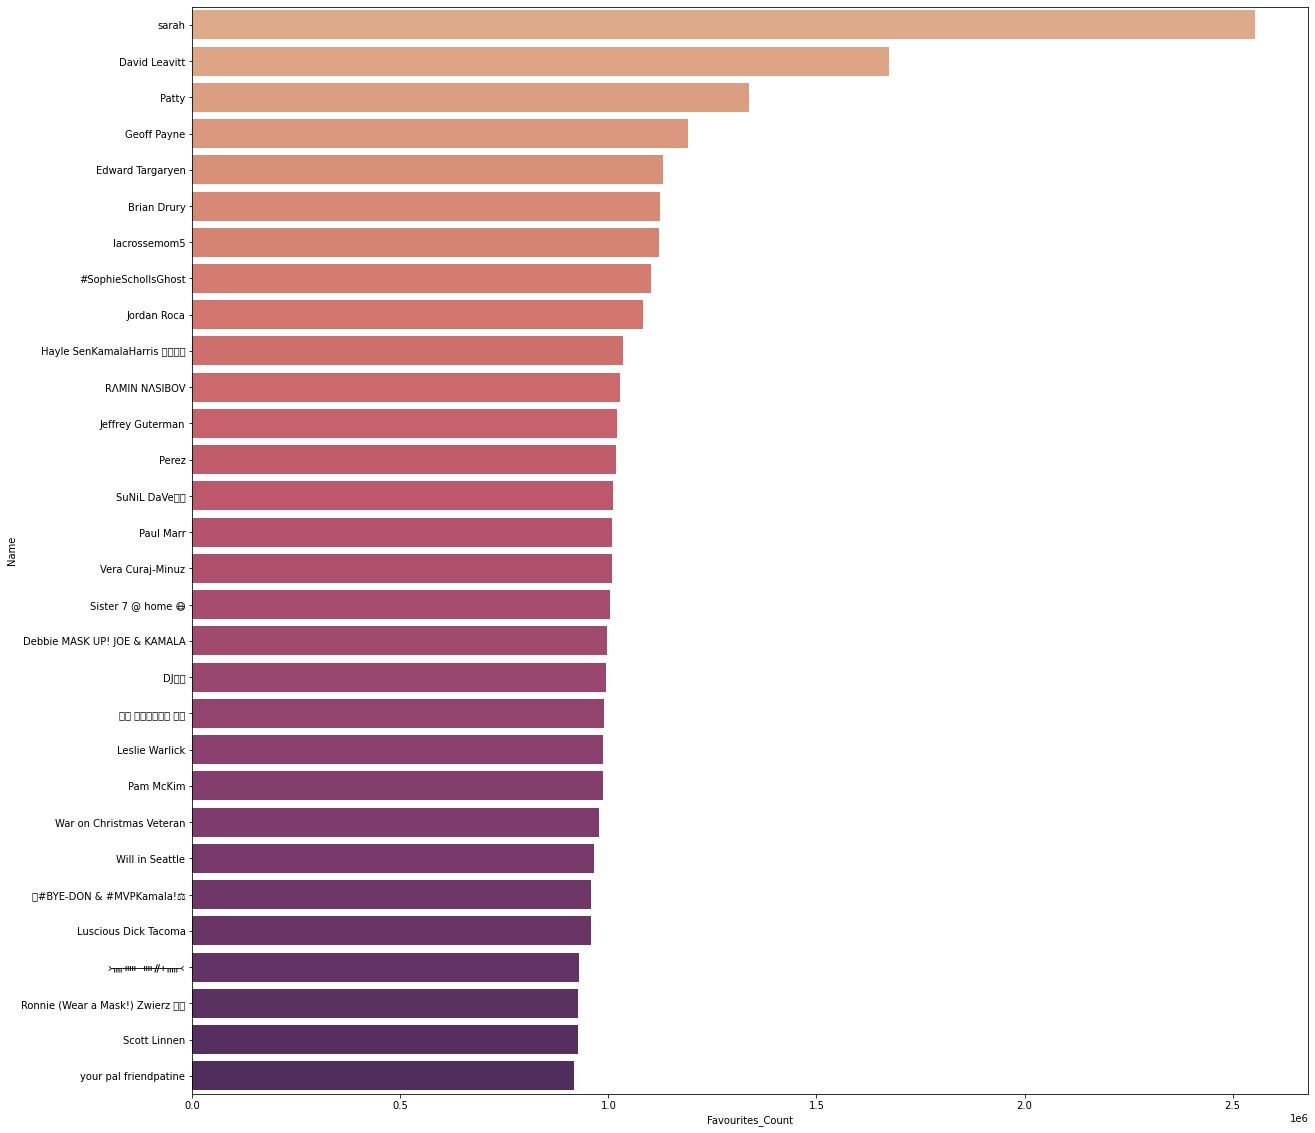

In [ ]:
 fig = plt.figure(figsize=(20,20))
favourites_by_user = df.pivot_table(values = "Favourites_Count", 
               index = ['Name'], 
               aggfunc = 'max')
favourites_by_user = favourites_by_user.sort_values("Favourites_Count", ascending= False).reset_index()
sns.barplot(x = 'Favourites_Count',  y = 'Name', data = favourites_by_user.head(30), palette = "flare");
plt.show()

Tweets_count is the number of Tweets a given user has liked in the account’s lifetime. It does not indicate a popularity, but it gives information about the engagement of the users on the platform and the accounts they follow. We could notice that the figures are not necessarily popular in medias. 

## E. World Maps

##### Map of number of covid tweets in english in the world

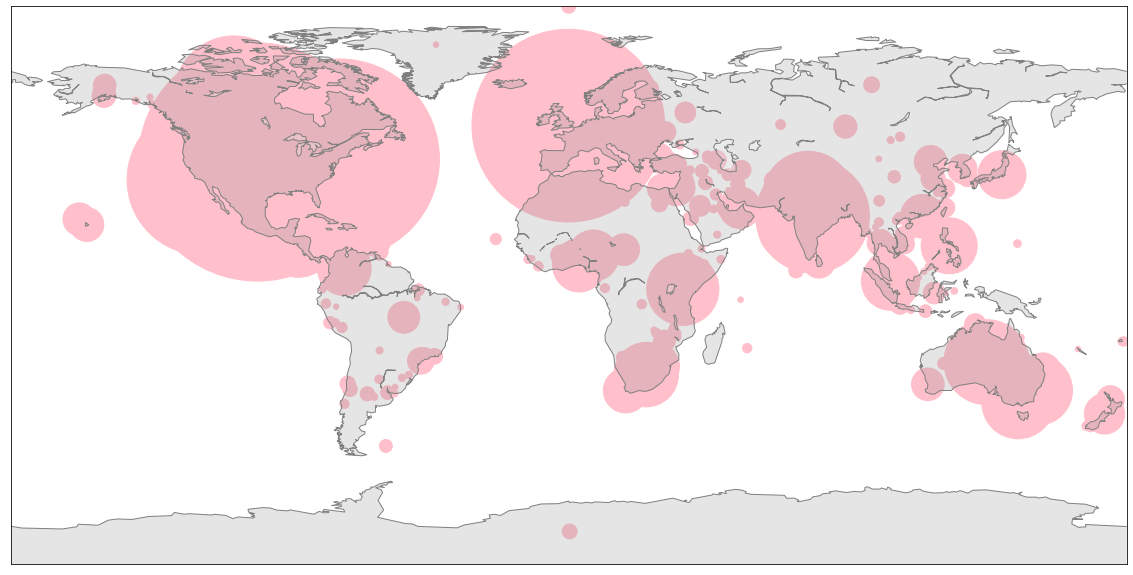

In [ ]:
data_map = df.groupby(["Longitude", "Latitude"]).count()['Id'].reset_index()
data_map = data_map.dropna()
map = Basemap()
fig = plt.figure(figsize=(20,20))
map.drawcoastlines(color = 'grey')
map.fillcontinents(color='grey', alpha=0.2)
map.scatter(data_map["Longitude"], data_map['Latitude'], color = 'pink', s = data_map['Id'])
plt.show()

We can see notice that the majority of tweets collected come mainly from the US, the UK and Europe, India, South Africa,  and Australia. This could be explained by the fact that  the tweets collected are in engligh. Moreover, these regions of the world are the one that use the most the platform. 

# Others

## Data dictionnary

- id
id	Int64	The integer representation of the unique identifier for this User. This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it. Using a signed 64 bit integer for storing this identifier is safe. Use id_str to fetch the identifier to be safe. See Twitter IDs for more information. Example:
		 
		"id": 6253282

- name		 
name	String	The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change. Example:
		 
		"name": "Twitter API"
- screen_name	 
screen_name	String	The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. Use id_str as a user identifier whenever possible. Typically a maximum of 15 characters long, but some historical accounts may exist with longer names. Example:
		 
		"screen_name": "twitterapi"
- location	 
location	String	Nullable . The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable. This field will occasionally be fuzzily interpreted by the Search service. Example:
		 
		"location": "San Francisco, CA"
- description		 
description	String	Nullable . The user-defined UTF-8 string describing their account. Example:
		 
		"description": "The Real Twitter API."
- verified		 
verified	Boolean	When true, indicates that the user has a verified account. See Verified Accounts . Example:
		 
		"verified": false
- followers_count		 
followers_count	Int	The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"followers_count": 21
- friends_count	 
friends_count	Int	The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"friends_count": 32
- favourites_count	 
favourites_count	Int	The number of Tweets this user has liked in the account’s lifetime. British spelling used in the field name for historical reasons. Example:
		 
		"favourites_count": 13
- created_at		 
created_at	String	The UTC datetime that the user account was created on Twitter. Example:
		 
		"created_at": "Mon Nov 29 21:18:15 +0000 2010"
		 


 From https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/user-object

The Id is the integer representation of the unique identifier for a twitter user